In [1]:
# --- Notebook Theme (codes from @vivek468 & @sonalisingh1411) ---
from IPython.core.display import display, HTML, Javascript

color_map = ['#219EBC', '#80CED7']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 215, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 215, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 5px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s; 
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;


}
'''

def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 85%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()


# <h1 style="font-family: Times New Roman; padding: 12px; font-size: 48px; color: #ff4f33; text-align: center; line-height: 1.25;"><b>Cardiovascular Diseases💓</b><br><span style="color: #000000"> Are you more prone to Cardiovascular Diseases?☠</span></b><br><span style="color: #219EBC; font-size: 24px">Want to know about it. Let’s dive in!!🧙‍♂️</span></h1>
<hr>

# <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | Introduction</div>

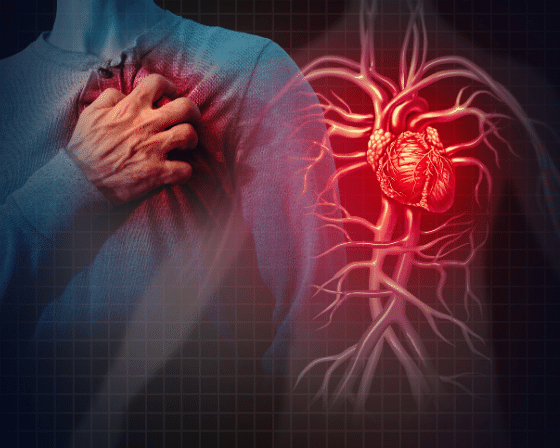


## <div style="font-family: Times New Roman; background-color: #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">Problem Statement 🤔</div>
<div style="font-family: Times New Roman; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health.</b>

## <div style="font-family: Times New Roman; background-color: #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">Notebook Objectives 📌</div>
<div style="font-family: Times New Roman; line-height: 2; color: #000000; text-align: justify">
    👉 <b>This notebook aims to</b>:
    <ol>
        <li><mark><b>Preliminary analysis:</b></mark><ul>
<li>Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
</li><li>Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy
</li></ul>
        </li>
        <li><mark><b>Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:</b></mark> <ul><li>Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data
</li><li>Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 
</li><li>Study the occurrence of CVD across the Age category
</li><li>Study the composition of all patients with respect to the Sex category
</li><li>Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
</li><li>Describe the relationship between cholesterol levels and a target variable
</li><li>State what relationship exists between peak exercising and the occurrence of a heart attack
</li><li>Check if thalassemia is a major cause of CVD
</li><li>List how the other factors determine the occurrence of CVD
</li><li>Use a pair plot to understand the relationship between all the given variables
</ul></li>
        <li><mark><b>Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection</b></mark></li>
    </ol>
</div>

## <div style="font-family: Times New Roman; background-color: #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">Dataset Description 📌</div>
<div>
    <table style = "border: 1px solid black;border-collapse: collapse;font-family: Times New Roman;">
     <tr><td><b>Variable</b></td><td><b>Description</b>
</td></tr><tr><td>Age</td><td>Age in years
</td></tr><tr><td>Sex</td><td>1 = male; 0 = female
</td></tr><tr><td>cp|</td><td>Chest pain type
</td></tr><tr><td>trestbps</td><td>Resting blood pressure (in mm Hg on admission to the hospital)
</td></tr><tr><td>chol</td><td>Serum cholesterol in mg/dl
</td></tr><tr><td>fbs</td><td>Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
</td></tr><tr><td>restecg</td><td>Resting electrocardiographic results
</td></tr><tr><td>thalach</td><td>Maximum heart rate achieved
</td></tr><tr><td>exang</td><td>Exercise induced angina (1 = yes; 0 = no)
</td></tr><tr><td>oldpeak</td><td>ST depression induced by exercise relative to rest
</td></tr><tr><td>slope</td><td>Slope of the peak exercise ST segment
</td></tr><tr><td>ca</td><td>Number of major vessels (0-3) colored by fluoroscopy
</td></tr><tr><td>thal</td><td>3 = normal; 6 = fixed defect; 7 = reversible defect
</td></tr><tr><td>Target</td><td>1 or 0
</td></tr>
    </table>
</div>

# <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | Importing Required Libraries📚</div>

In [2]:
#to handle datasets
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set(rc={'axes.facecolor': '#FBFBFB', 'figure.facecolor': '#FBFBFB'})
sns.set_style('white')
plt.rcParams['figure.dpi']=180

#for displaying max columns
pd.pandas.set_option('display.max_columns',None)

#for statistical transfromation
from scipy.stats import norm
from scipy import stats

#for splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#feature scaling
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | Reading Dataset🧐</div>

In [3]:
df = pd.read_excel('Health_Care.xlsx')

df.head(20).style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Times New Roman'})#.hide_index()

In [4]:
#shape of the dataset
df.shape

(303, 14)

In [5]:
#Data Types information from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

# <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3. | Data Analysis🧐</div>
<div style="font-family: Times New Roman;"><b>👉We will analyse the following:</b>
<ul>
    <li>The target variable
    </li><li>Variable types (categorical and numerical)
    </li><li>Missing data
    </li><li>Numerical variables</li>
    <ol>
         <li>    Discrete
    </li><li>    Continuous
    </li><li>    Distributions
    </li><li>    Transformations</li>   
    </ol>
    <li>    Categorical variables</li>
    <ol>
        <li>    Cardinality
    </li><li>    Rare Labels</li>
    <li>    Special mappings</li>
    </ol>
</ul></div>

In [7]:
from pandas_profiling import ProfileReport
# --- Train Dataset Report ---
ProfileReport(df, title='Dataset', minimal=True, progress_bar=False,
              samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True,
              notebook={'iframe':{'height': '600px'}},
              html={'style':{'primary_color': '#219EBC'}},
              missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.1 | Target Variable Analysis🧐</div>

In [8]:
def target_var_analysis(df):
    df = df.copy()
    df['Target_Descr'] = np.where(df['target']==0,'Non Heart-Attack','Heart-Attack')
    plt.figure(figsize = (8,3))
    plt.suptitle('Prone to Heart Disease', fontweight='heavy', x=0.125, y=1.12, ha='left', fontsize=20) 
    
    plt.subplot(1,2,1)
    plt.title('Is human race going to extinguish?\n', style='italic', fontsize=10, loc='left')
    ax = sns.countplot(x = df['Target_Descr'],palette = "Set2")
    ax.bar_label(ax.containers[0])#Here, we are adding the container that is holding the count to bar_label
    ax.axes.yaxis.set_ticks([])
    ax.set(xlabel = None)
    #plt.axis('off')
    #plt.xlabel('\nTitles', fontweight='bold', fontsize=8, fontfamily='sans-serif')
    plt.ylabel('Survival Count\n', fontweight='bold', fontsize=8, fontfamily='sans-serif')
    plt.axvspan(-1.45, 4.15, color='#FAF884', alpha=0.2, zorder=2)
    plt.xticks(fontsize=7, rotation=90)
    plt.yticks(ticks = None)
    #plt.axis('off')
    #sns.despine()
    plt.box(on=False) #to hide spines
    
    plt.subplot(1,2,2)
    df['target'].value_counts().plot(kind='pie',autopct='%1.0f%%',colors = ['#f96849','#e5e5e5'], explode = (0.02, 0),labels = ['Heart-Attack','Non Heart-Attack'],fontsize = 8)
    plt.ylabel(None)
    plt.axis('off')#to get rid of ticks and axis
    #plt.box(on=False)
    #plt.xticks(ticks = None)
    #plt.yticks(ticks = None)
    
    
    plt.show()

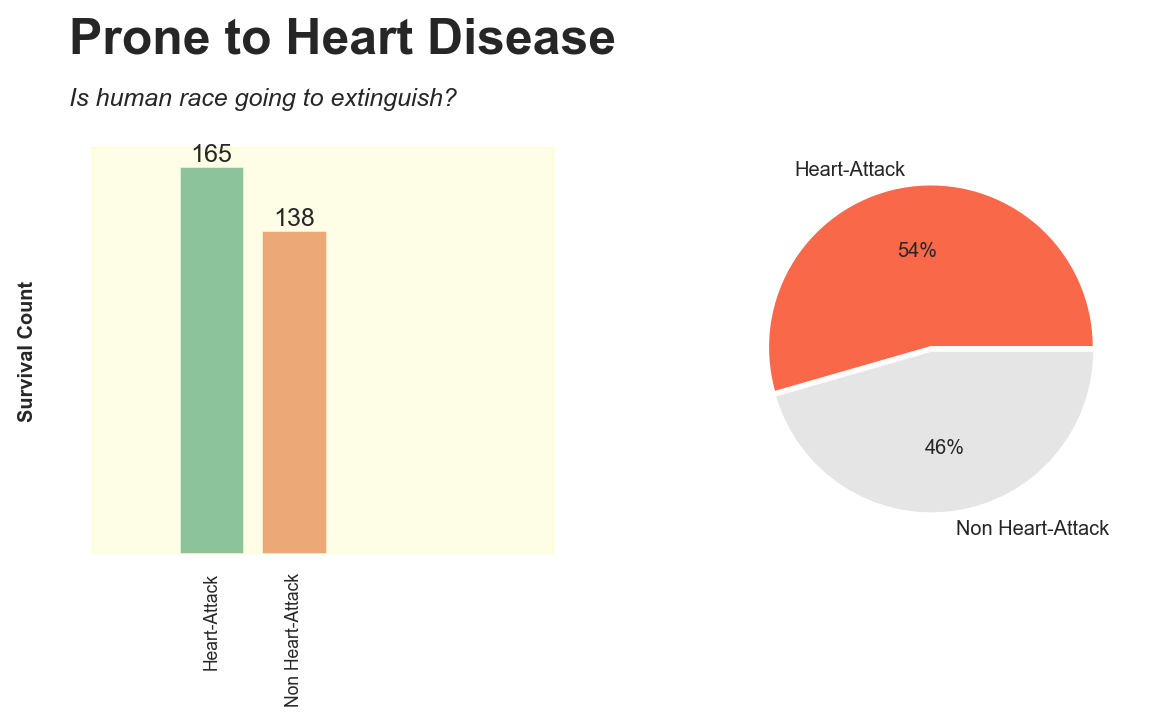

In [9]:
target_var_analysis(df)

***Extra Reading Material*** On Plot Spines - <a href = 'https://towardsdatascience.com/handling-plot-axis-spines-in-python-f143b8554da2'>Source : TowardsDataScience</a>

Subplots - 

<a href = 'https://towardsdatascience.com/customizing-multiple-subplots-in-matplotlib-a3e1c2e099bc'>Source: TowardsDataScience</a>

<a href = 'https://www.mathworks.com/matlabcentral/answers/1467206-plotting-subplot-with-different-columns-in-the-rows'>Source: Matplotlib Community</a>

<a href = 'https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html'>Matplotlib</a>

PiePlot & Donut Plot - 

<a href = 'https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f'>Source: TowardsDataScience</a>

<a href = 'https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiW6u2E6N75AhVu6nMBHfKAAXUQFnoECAMQAQ&url=https%3A%2F%2Ftowardsdatascience.com%2Fplt-subplot-or-plt-subplots-understanding-state-based-vs-object-oriented-programming-in-pyplot-4ba0c7283f5d&usg=AOvVaw3uc3WzNK9XV7A-zlxMRzeu'>Stackoverflow : subplot vs subplots</a>

<a href = 'https://www.geeksforgeeks.org/matplotlib-figure-figure-dpi-in-python/'>GeeksForGeeks - Figure Properties</a>

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.2 | Variable Type Analysis🧐</div>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


It can be observed that all variables in dataset are <mark><b>numerical</b></mark>.

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.3 | Missing Data Analysis🧐</div>

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

It can be observed that the data is clean and no manipulation is required on the dataset.

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.4 | Duplicate Data Analysis🧐</div>

In [12]:
df.duplicated().sum()

1

In [13]:
df[df.duplicated()].head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1

In [14]:
df.shape

(303, 14)

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(302, 14)

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.5 | Numerical Variable Analysis🧐</div>

In [17]:
df_num_dis = [var for var in df.columns if df[var].nunique()<15 and var!= 'target']
print("No of discrete values: {} and they are: {}".format(len(df_num_dis),df_num_dis))
df_num_con = [var for var in df.columns if var not in df_num_dis and var!= 'target']
print("No of continuous values: {} and they are: {}".format(len(df_num_con),df_num_con))

No of discrete values: 8 and they are: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
No of continuous values: 5 and they are: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


***Extra Reading Material*** - <a href= 'https://stackoverflow.com/questions/56310788/different-outcome-using-pandas-nunique-and-unique'>Stackoverflow - unique vs nunique</a>

<a href = 'https://stats.stackexchange.com/questions/312437/statistical-data-types-difference-between-categorical-ordinal-and-numerical'>StackExchange - Discrete Numerical Variables vs Ordial Variables</a>

In [18]:
#Discrete value analysis
def set_spines_visibility(ax, is_visible):
    for s in ['left', 'right', 'top', 'bottom']:
        ax.spines[s].set_visible(is_visible)

def num_dis_analysis(df,dis_var):
    df = df.copy()
    length = len(dis_var)
    
    if length%2 == 0:
        fig, ax = plt.subplots(length//2+1,2,figsize = (10,20))
    else:
        fig,ax = plt.subplots(length//2+1,2,figsize = (10,20))
        
    ax[0,0].text(x=0.5, y=0.5, s="Count plot for \n Discrete variables",
        verticalalignment='center', horizontalalignment='center',
        fontsize='25', fontweight='bold')
    ax[0,0].axis('off')
    
    row = 0
    for i,var in enumerate(dis_var):
        i=i+1
        if i%2 == 1:
            set_spines_visibility(ax[row,1], False)
            p1 = sns.countplot(ax = ax[row,1],data=df,x=var)
            p1.bar_label(p1.containers[0])
        else:
            row = row+1
            set_spines_visibility(ax[row,0], False)
            p2 = sns.countplot(ax = ax[row,0],data = df, x = var)
            p2.bar_label(p2.containers[0])
    ax[length//2,1].axis('off')
    plt.show()
    

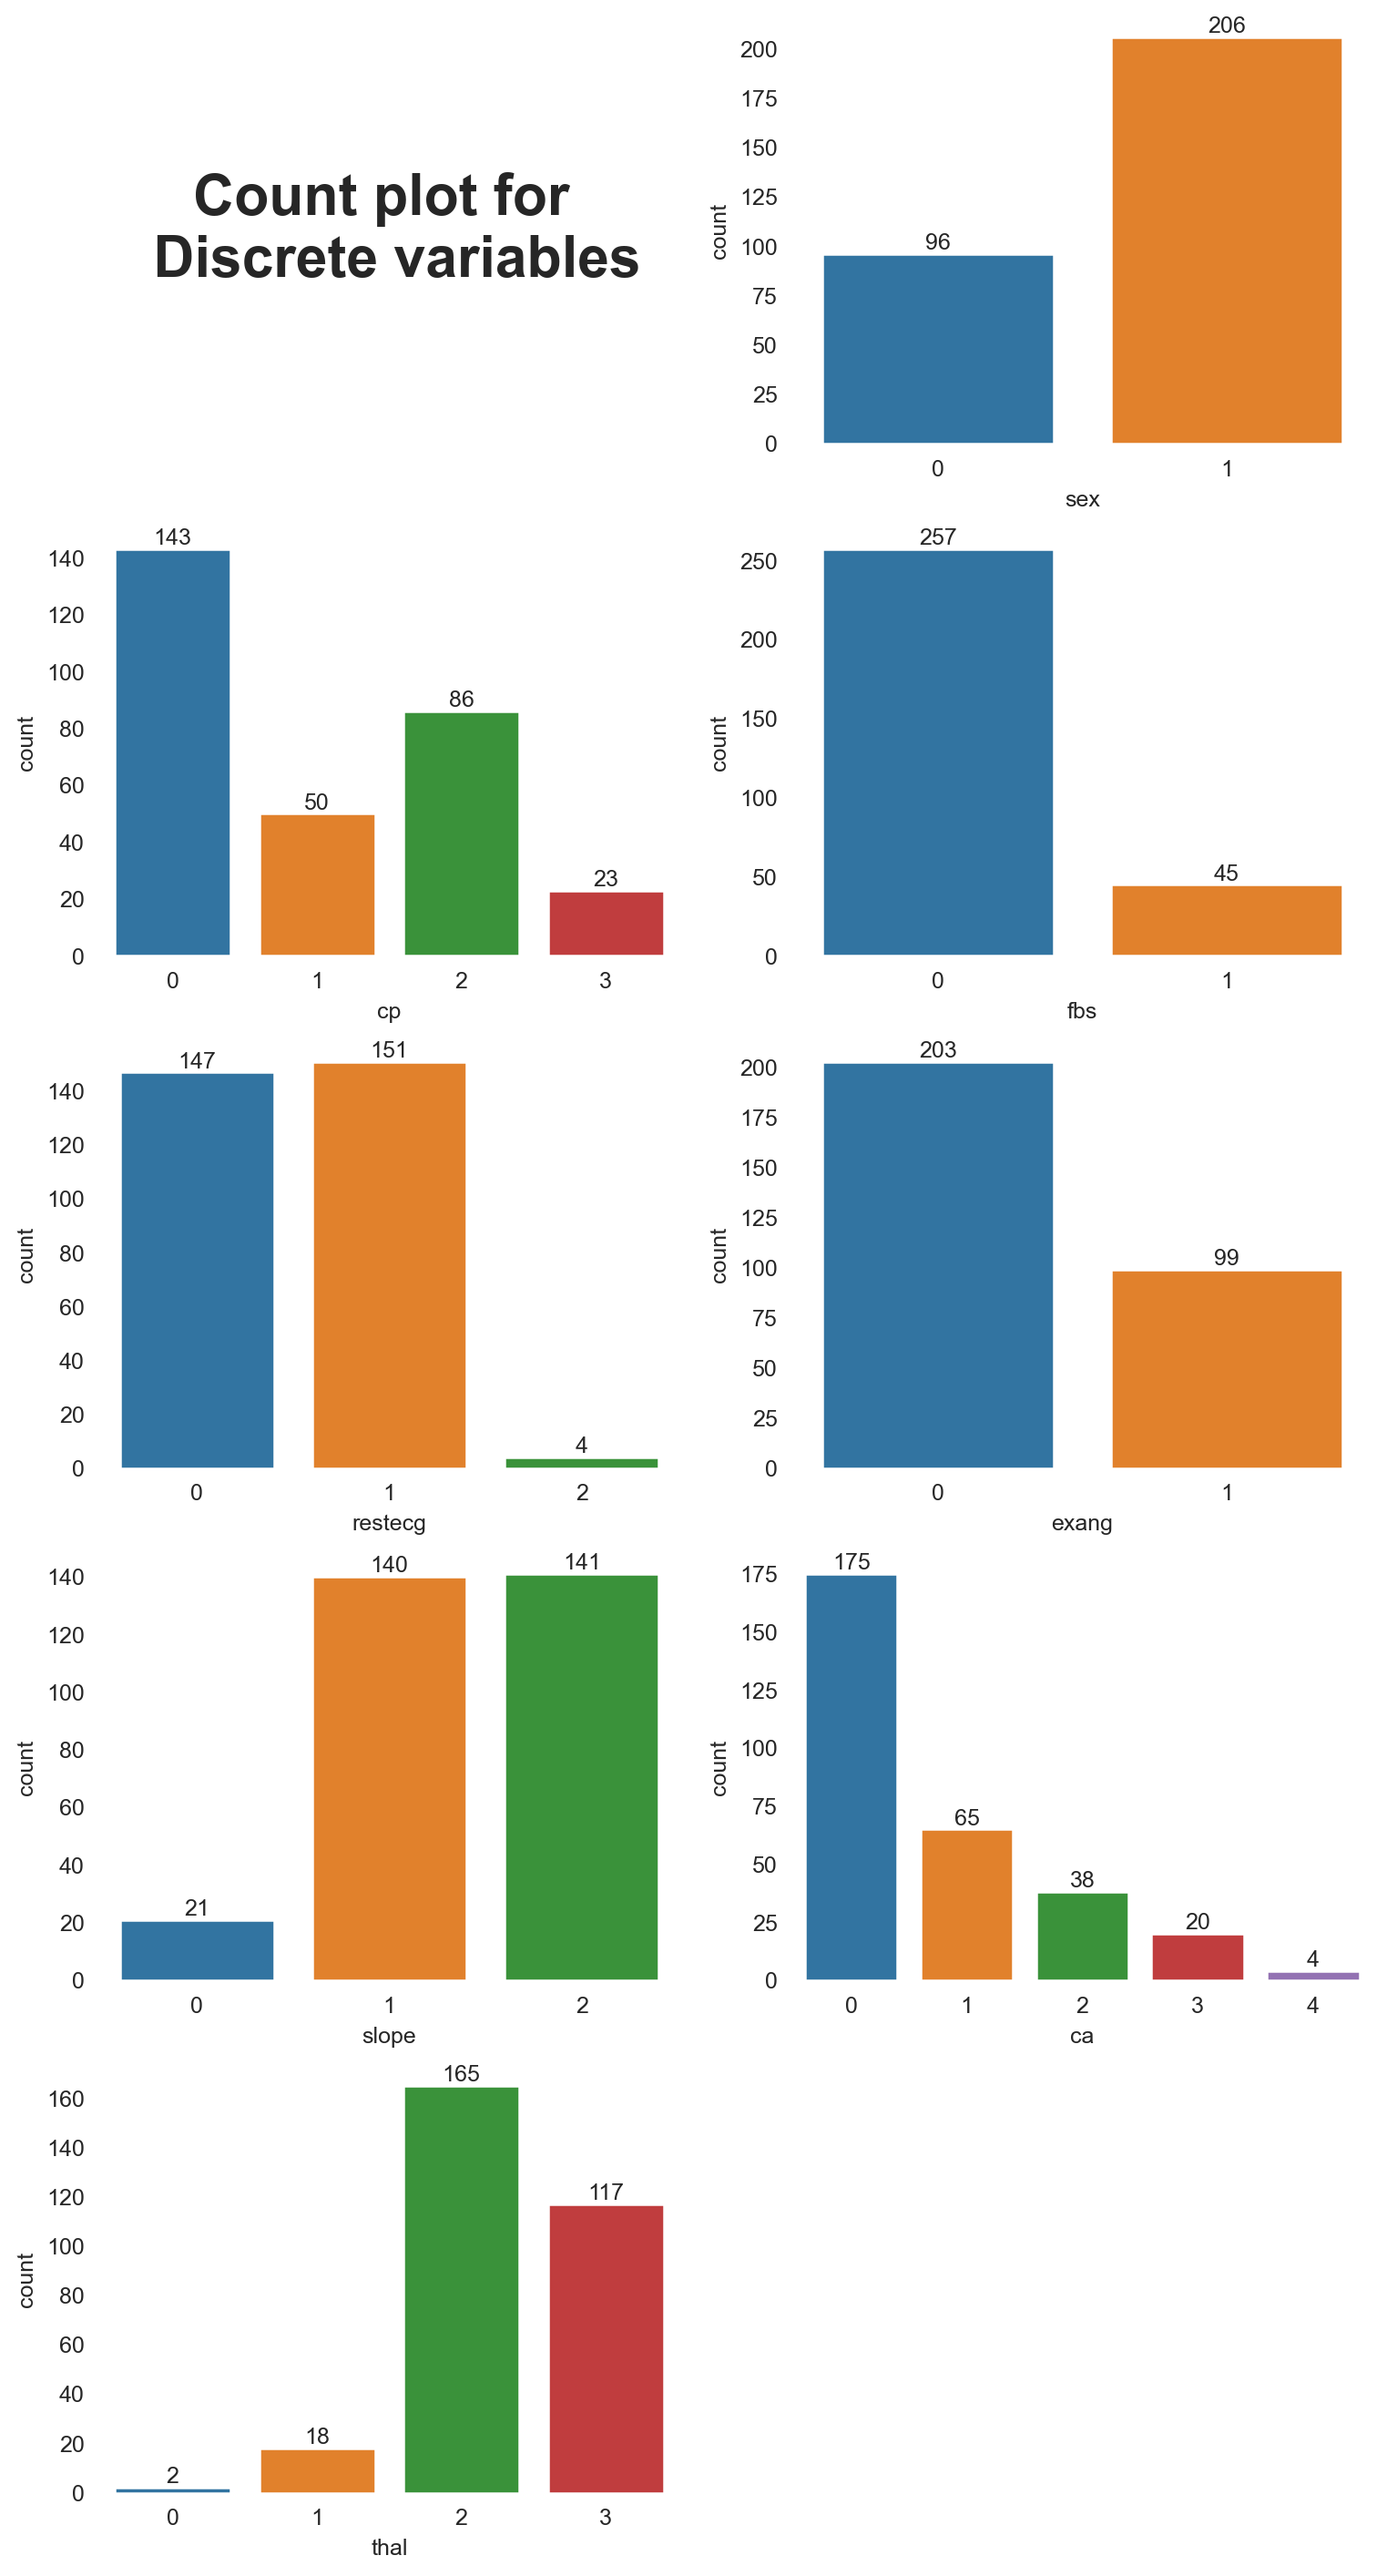

In [19]:
num_dis_analysis(df,df_num_dis)

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.5.1 | Cardinality🧐</div>

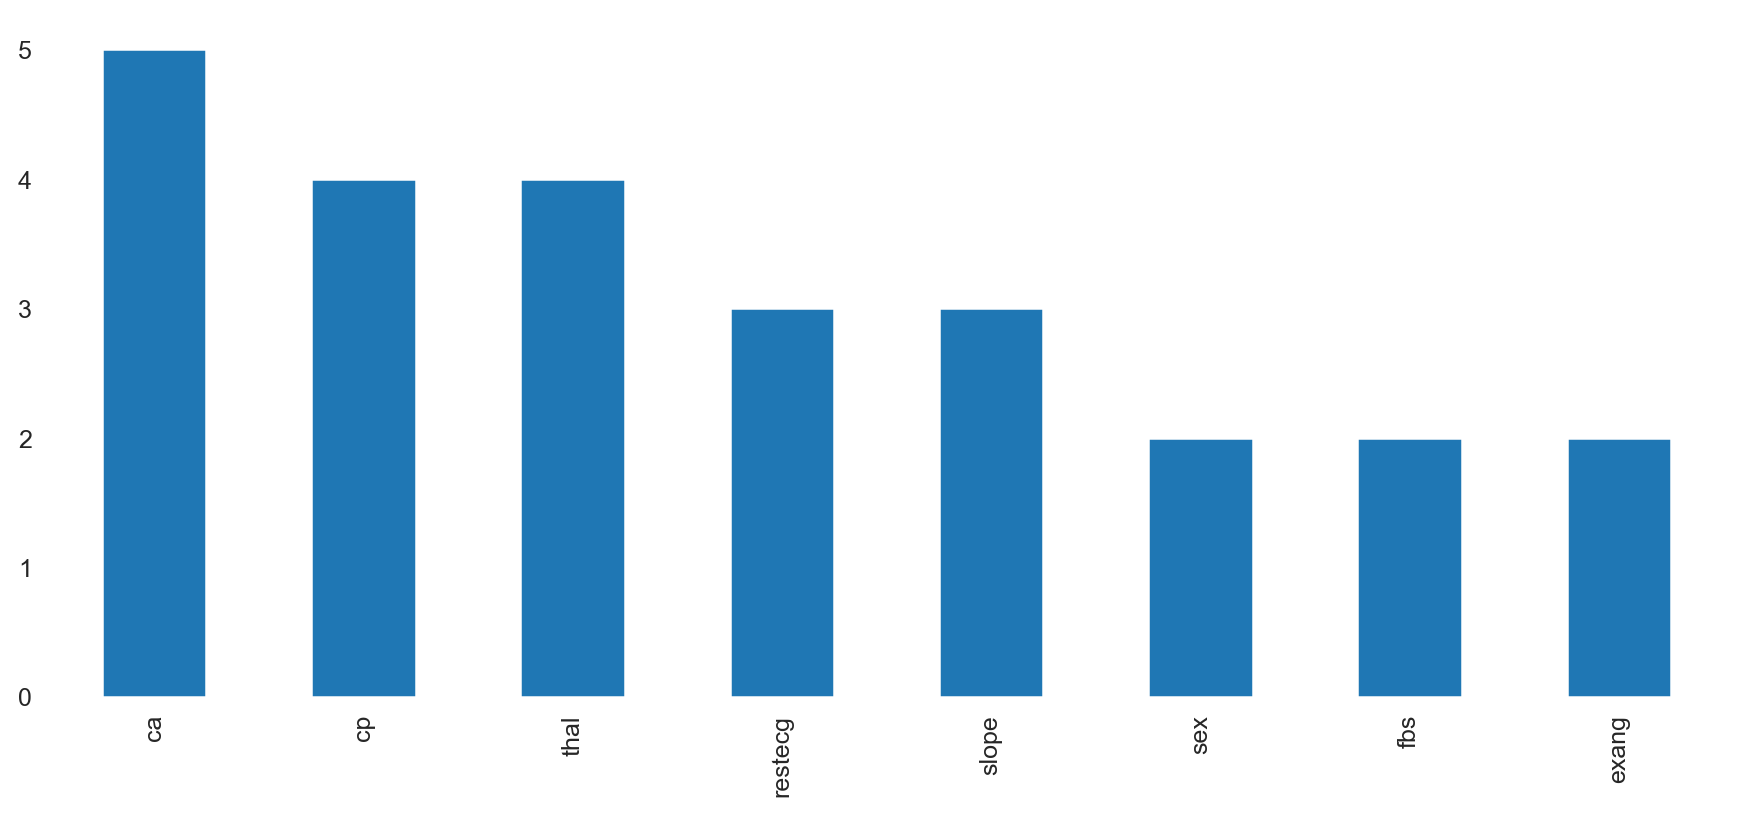

In [20]:
df[df_num_dis].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))
plt.box(on=False)
plt.show()

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.5.2 | Rare Labels🧐</div>

In [21]:
def num_con_analysis(df,con_var):
    df = df.copy()
    length = len(con_var)
    
    if length%2 == 0:
        fig, ax = plt.subplots(length//2+1,2,figsize = (10,20))
    else:
        fig,ax = plt.subplots(length//2+1,2,figsize = (10,20))
        
    ax[0,0].text(x=0.5, y=0.5, s="Distribution plot for \n Continuous variables",
        verticalalignment='center', horizontalalignment='center',
        fontsize='25', fontweight='bold')
    ax[0,0].axis('off')
    
    row = 0
    for i,var in enumerate(con_var):
        i=i+1
        if i%2 == 1:
            set_spines_visibility(ax[row,1], False)
            sns.histplot(ax = ax[row,1],x=df[var])
        else:
            row = row+1
            set_spines_visibility(ax[row,0], False)
            sns.histplot(ax = ax[row,0],x=df[var])
    plt.show()
    

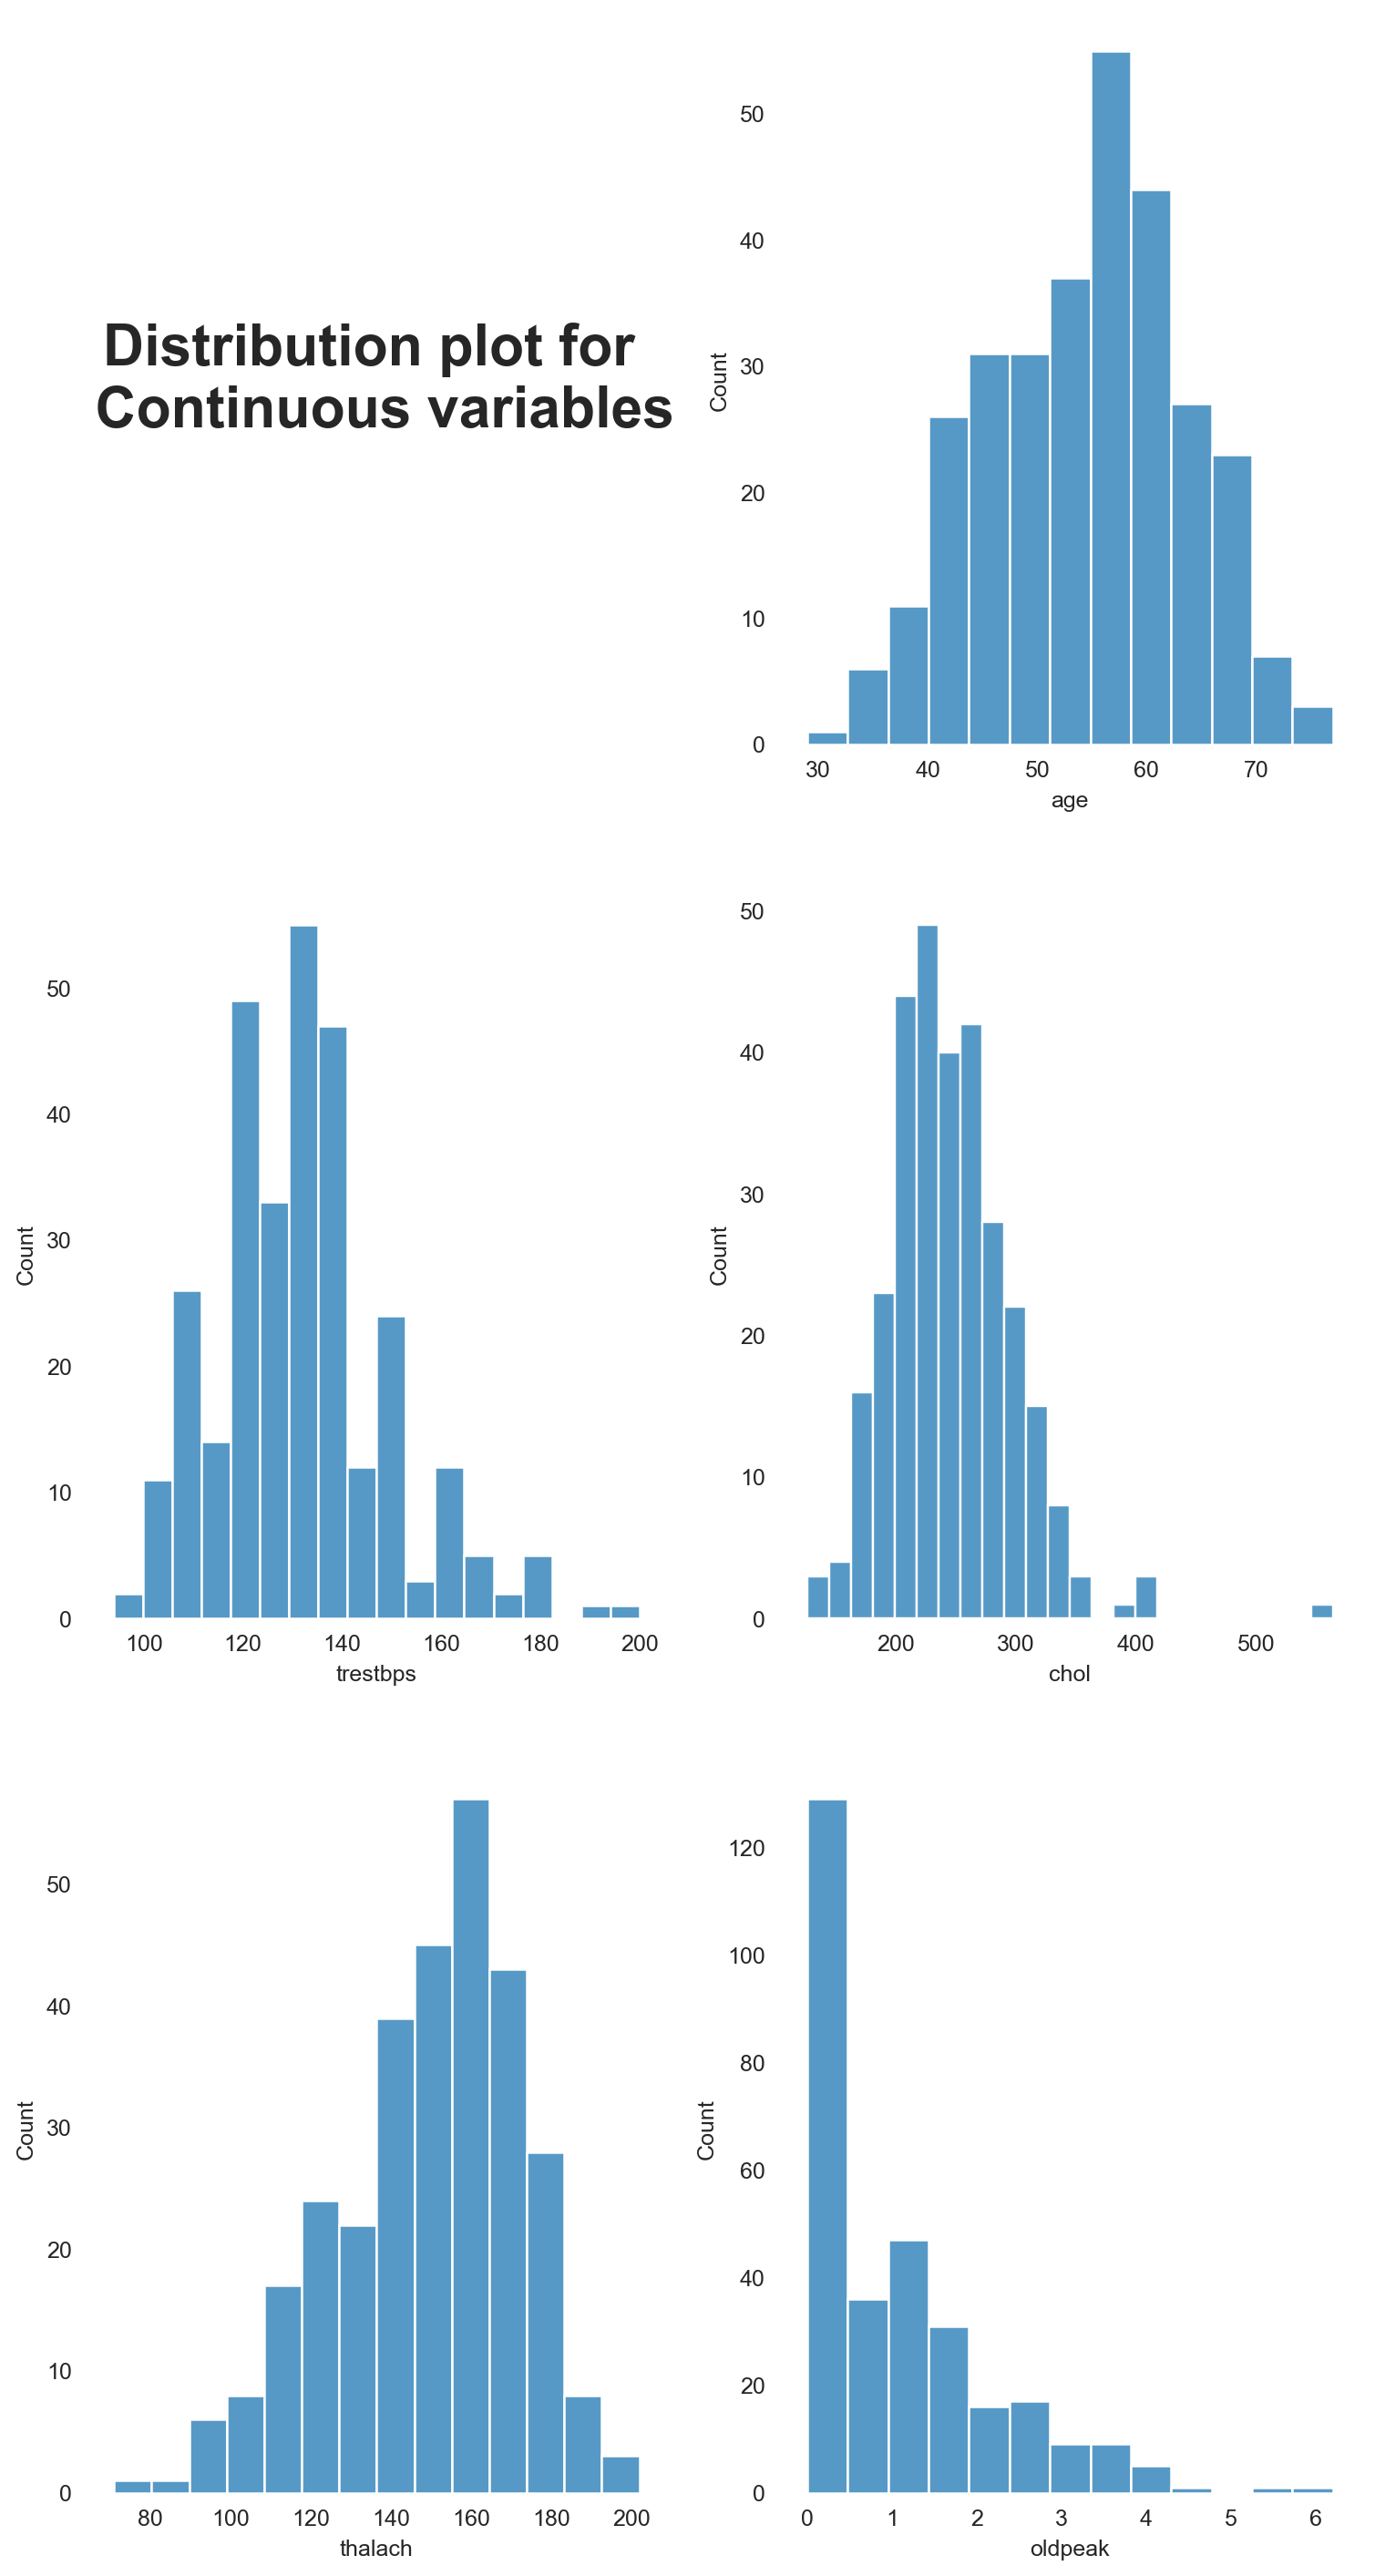

In [22]:
num_con_analysis(df,df_num_con)

In [23]:
def num_con_norm_analysis(df,con_var):
    df = df.copy()
    length = len(con_var)
    
    if length%2 == 0:
        fig, ax = plt.subplots(length//2+1,2,figsize = (10,20))
    else:
        fig,ax = plt.subplots(length//2+1,2,figsize = (10,20))
        
    ax[0,0].text(x=0.5, y=0.5, s="Distribution plot for \n Continuous variables",
        verticalalignment='center', horizontalalignment='center',
        fontsize='25', fontweight='bold')
    ax[0,0].axis('off')
    
    row = 0
    for i,var in enumerate(con_var):
        i=i+1
        if i%2 == 1:
            set_spines_visibility(ax[row,1], False)
            sns.distplot(ax = ax[row,1],x=df[var],fit=norm)
        else:
            row = row+1
            set_spines_visibility(ax[row,0], False)
            sns.distplot(ax = ax[row,0],x=df[var],fit=norm)
    plt.show()
    

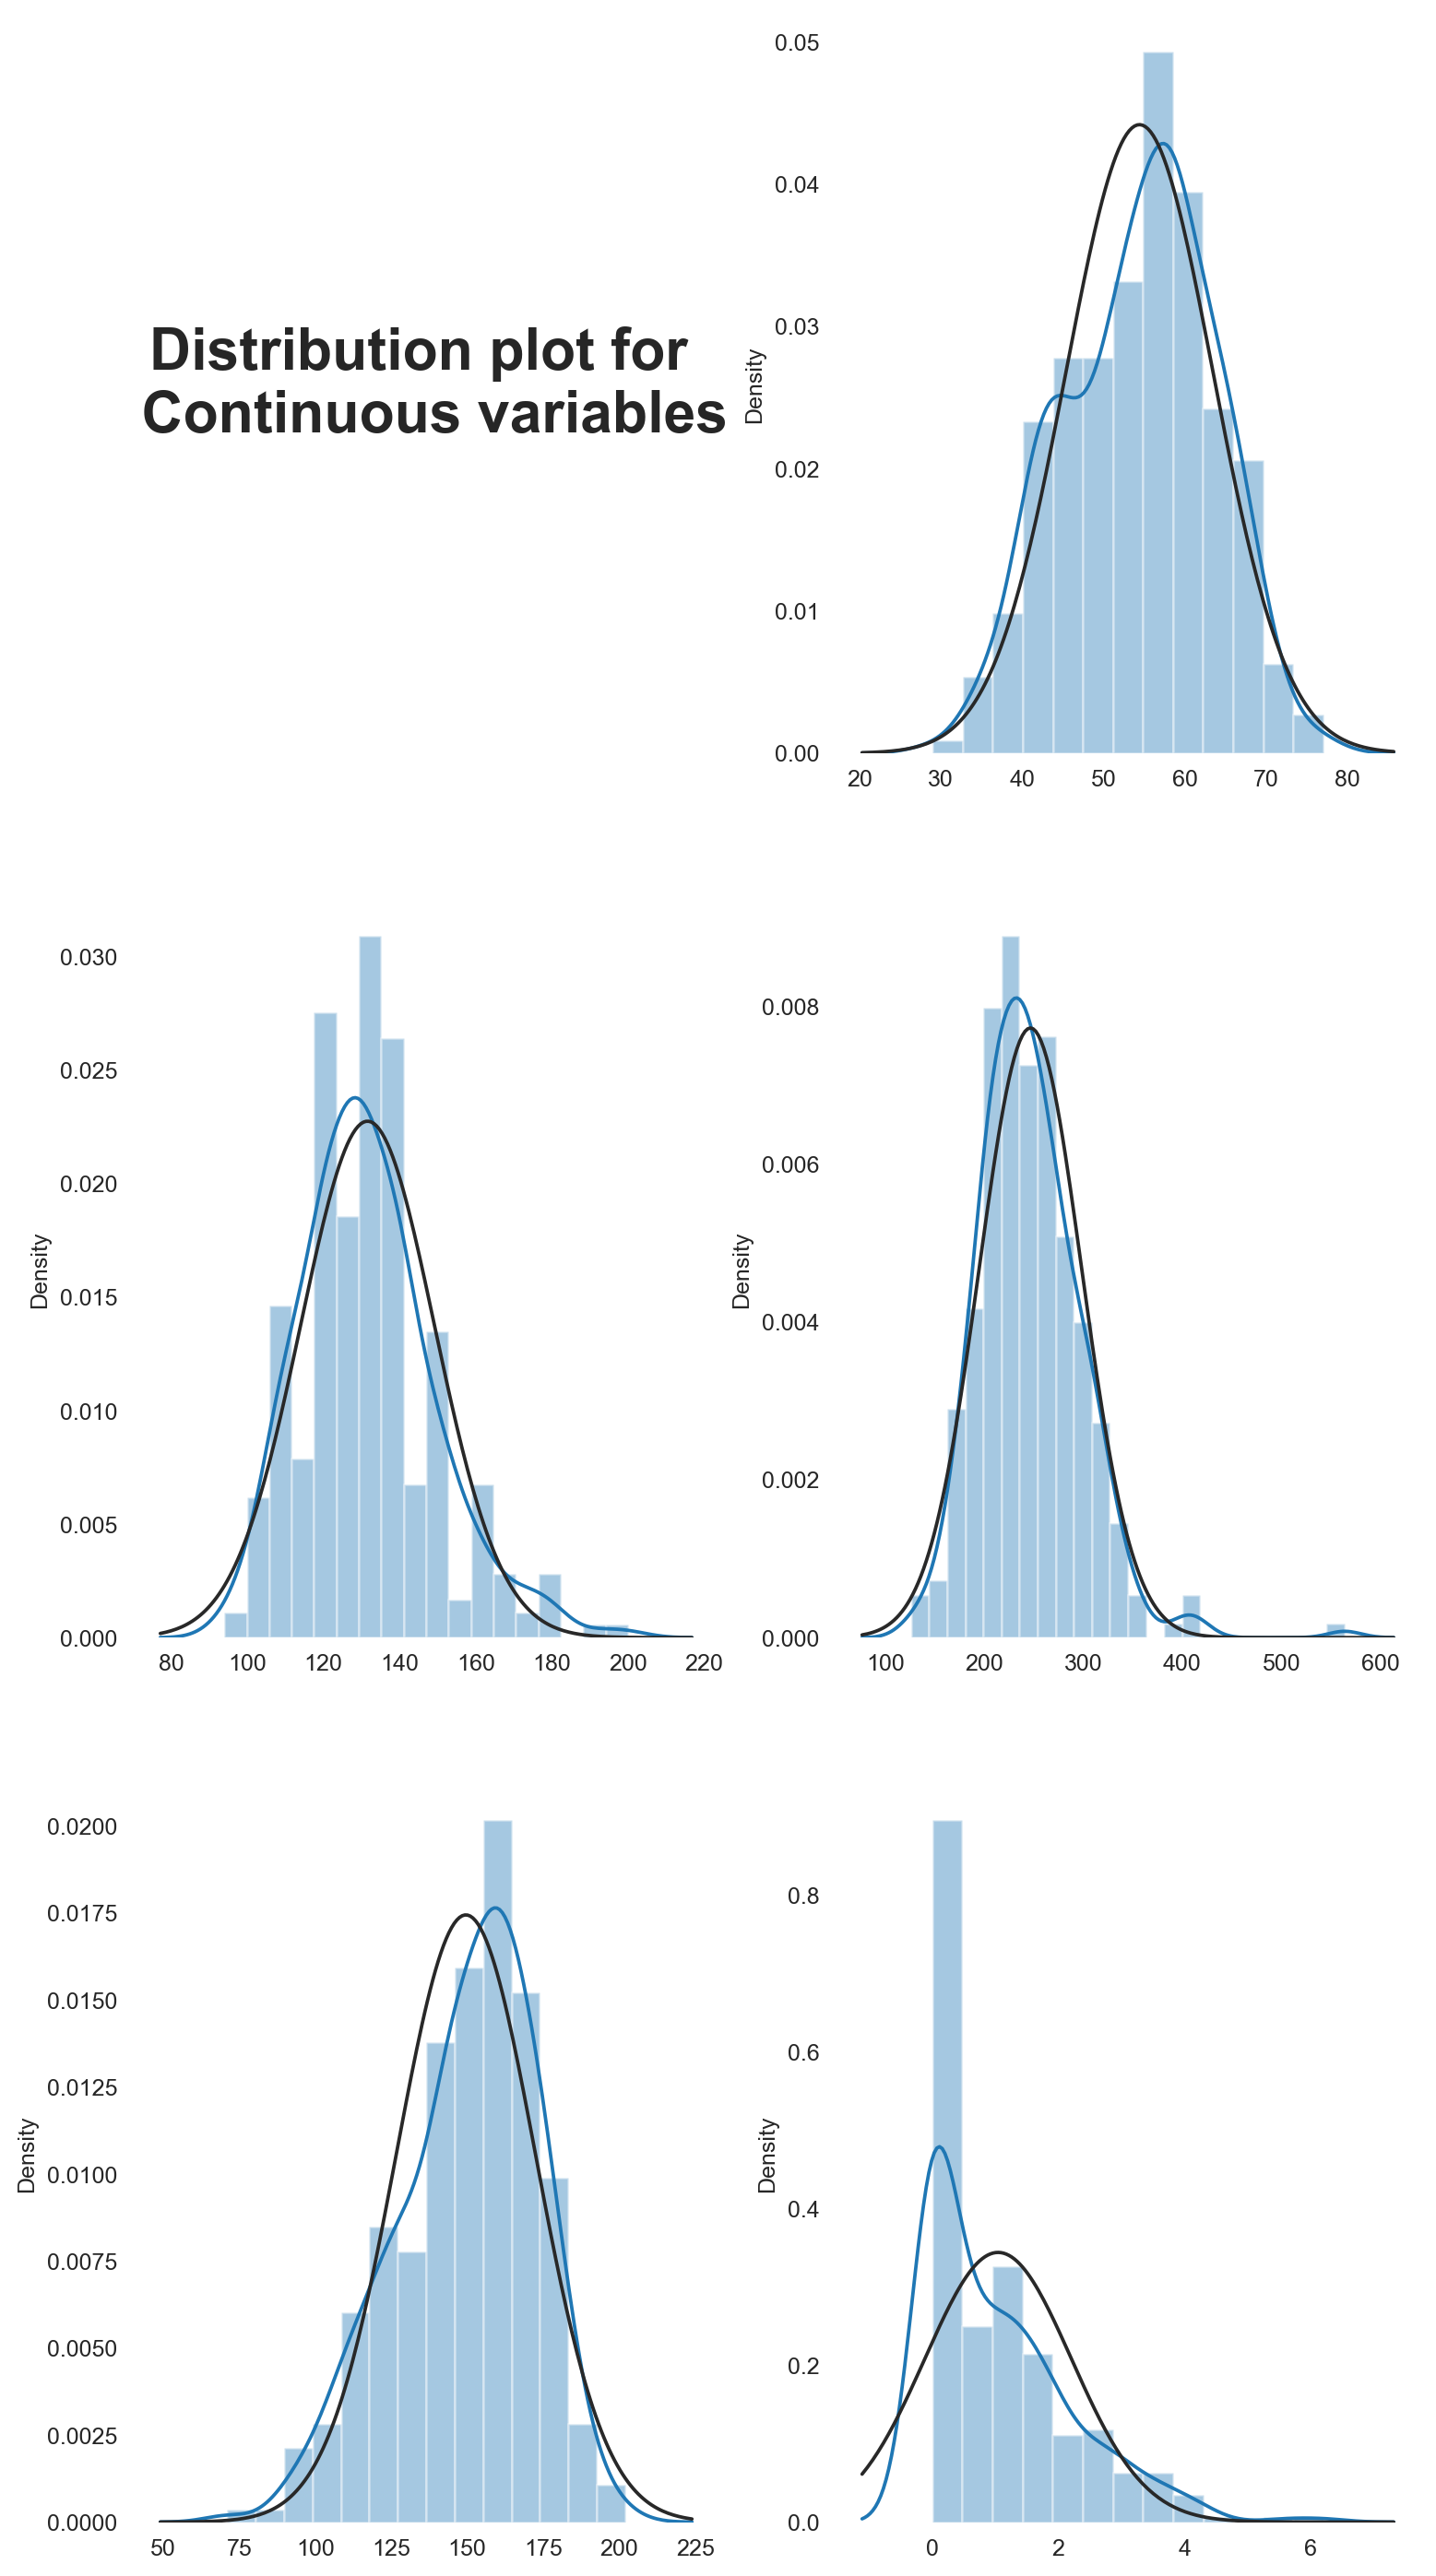

In [24]:
num_con_norm_analysis(df,df_num_con)

In [25]:
df[df_num_con].skew(axis=0)

age        -0.203743
trestbps    0.716541
chol        1.147332
thalach    -0.532671
oldpeak     1.266173
dtype: float64

***Reading Material*** - <a href = 'https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de'>Source: Medium.com - Skewness & Kurtosis</a>

<a href = 'https://www.geeksforgeeks.org/python-normal-distribution-in-statistics/'>Source: GeeksForGeeks - scipy.stats.norm()</a>

<a href = 'https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45'>Source: TowardsDataScience - Techniques for transforming data</a>

<a href = 'https://stats.stackexchange.com/questions/399435/which-constant-to-add-when-applying-box-cox-transformation-to-negative-values'>BoxCox - Negative Values</a>

From the above distplot(kdeplot+histplot) and skew(), it can be observed that the continuous numerical variable - chol,oldpeak are highly skewed. Let's apply box-cox to it.

In [26]:
def transform_skewed_var(df,skewed_variable):
    df = df.copy()
    
   
    df[skewed_variable] = stats.boxcox(df[skewed_variable])[0]
    print(df[skewed_variable].skew(axis = 0))
    plt.figure(figsize = (20,10))
    #visulaize the same
    plt.subplot(1, 2, 1)
    sns.distplot(df[skewed_variable])
    plt.box(on = False)
    plt.subplot(1, 2, 2)
    stats.probplot(df[skewed_variable], dist="norm", plot=plt)
    plt.box(on = False)
    plt.show()
    
def transform_skewed_neg_var(df,skewed_variable):
    df = df.copy()
    
   
    df[skewed_variable] = stats.boxcox(df[skewed_variable]+10)[0]
    print(df[skewed_variable].skew(axis = 0))
    plt.figure(figsize = (20,10))    
    #visulaize the same
    plt.subplot(1, 2, 1)
    sns.distplot(df[skewed_variable])
    plt.box(on = False)
    plt.subplot(1, 2, 2)
    stats.probplot(df[skewed_variable], dist="norm", plot=plt)
    plt.box(on = False)
    plt.show()

-0.006025706195089309


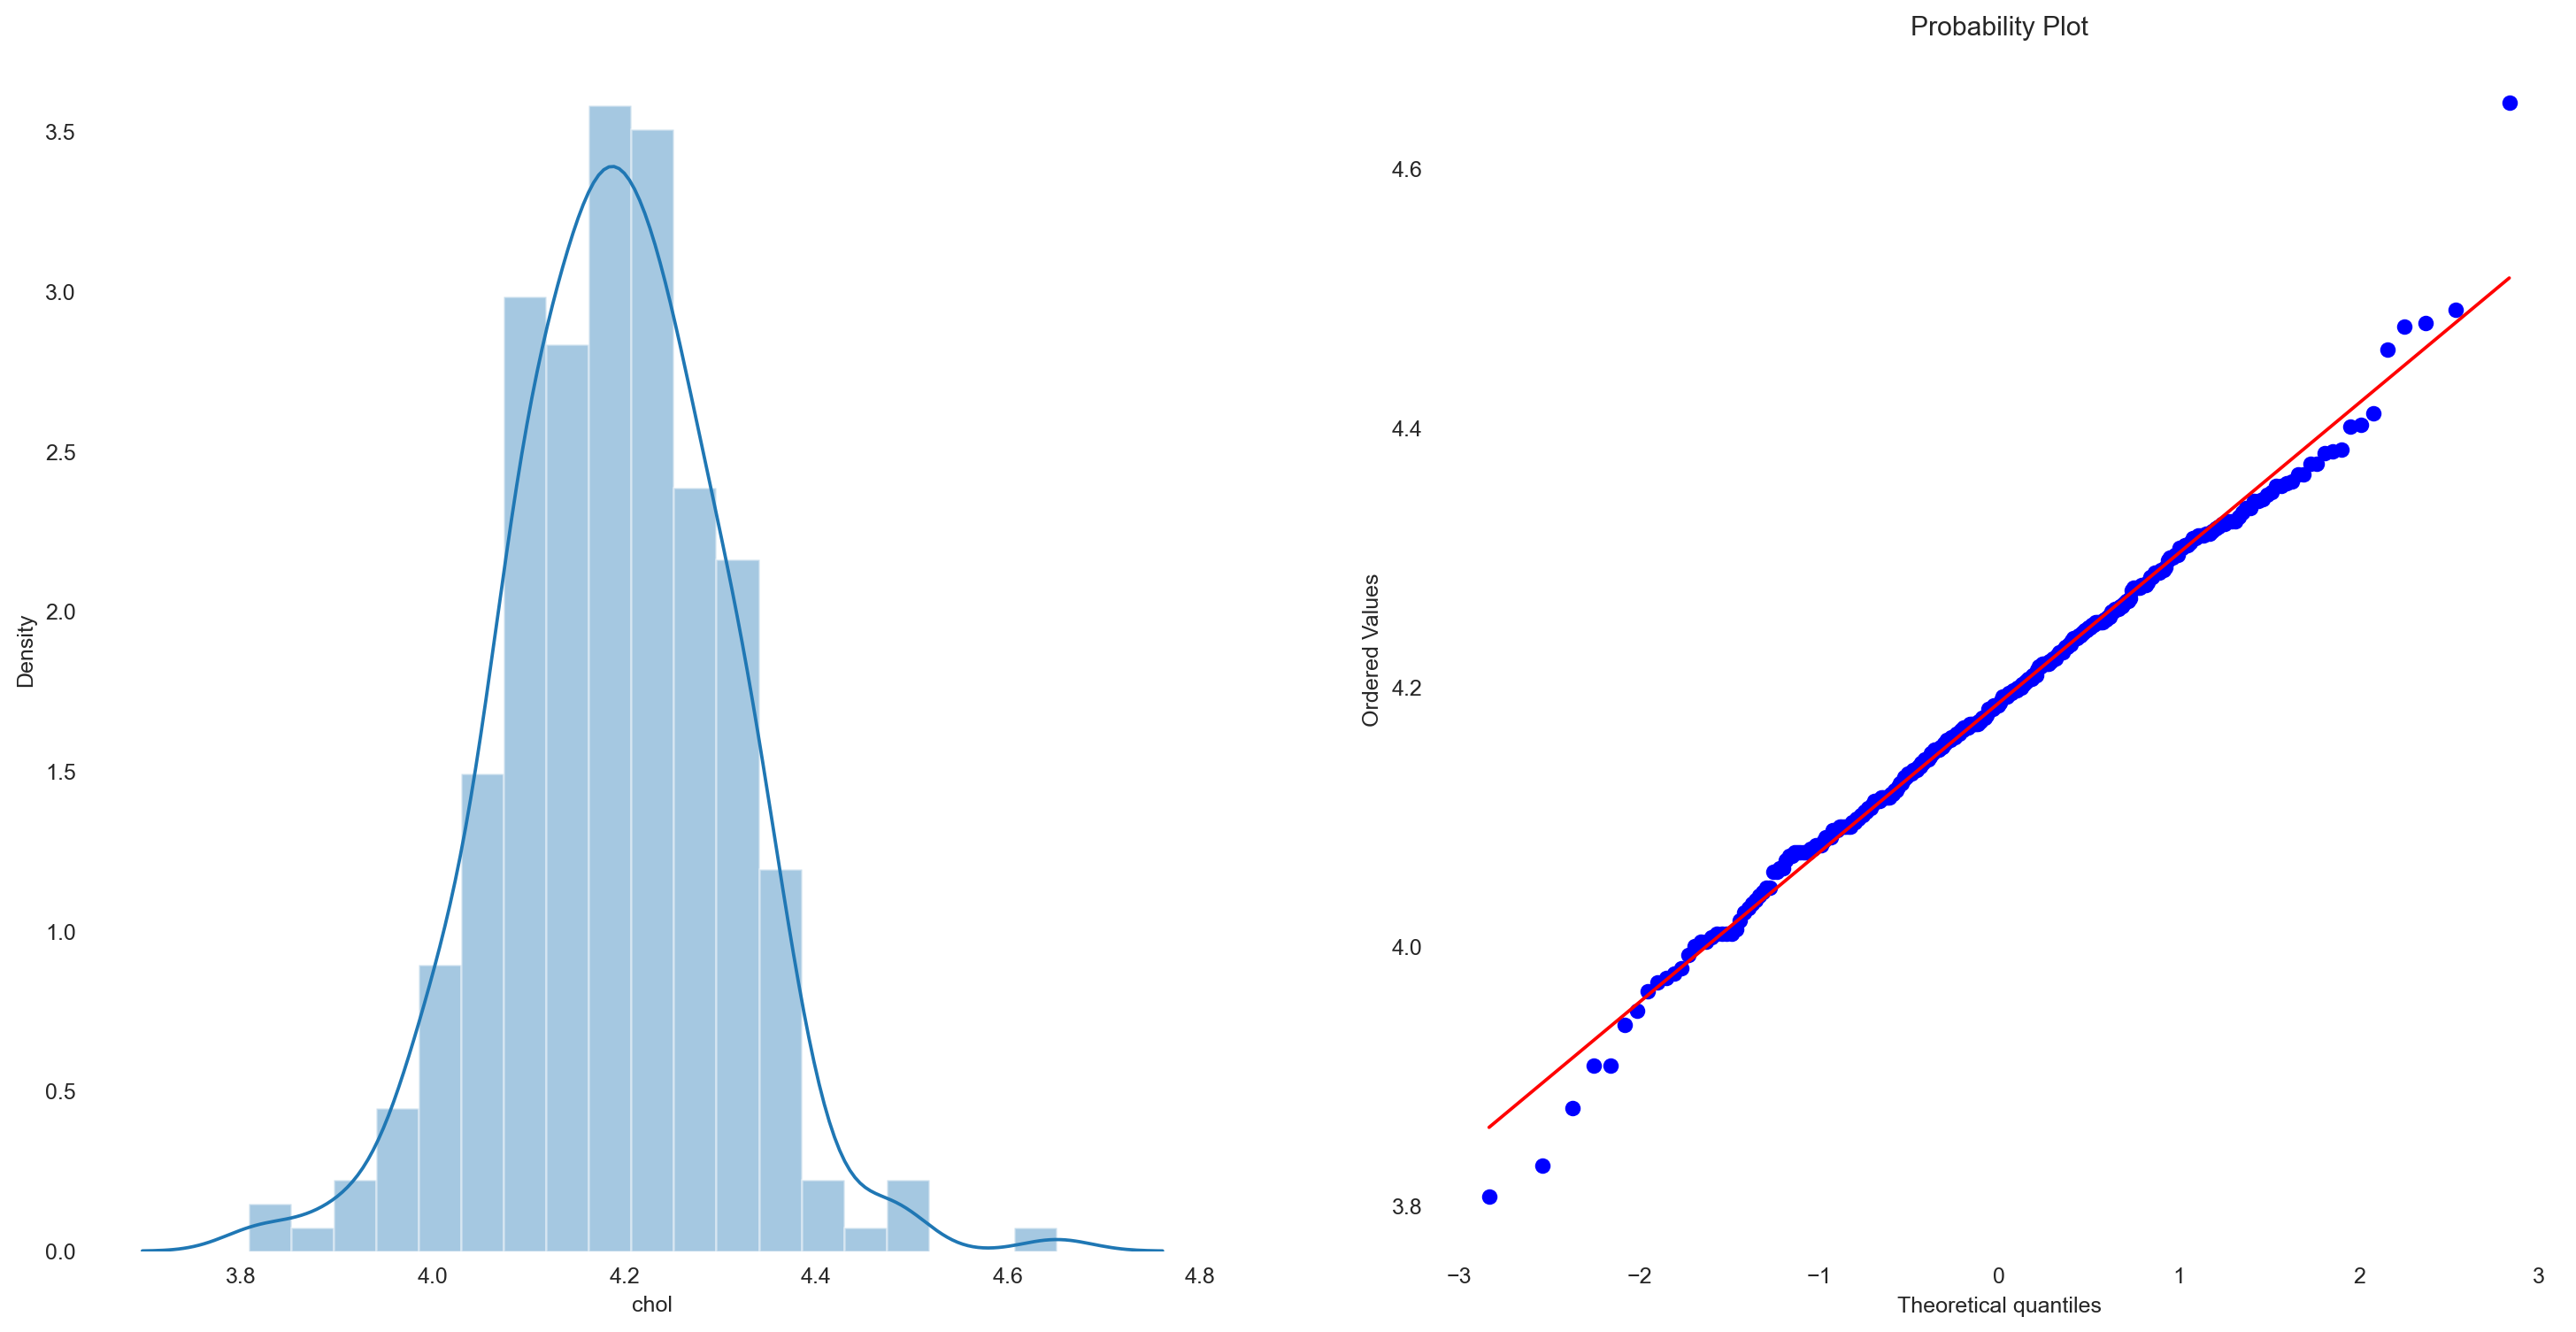

In [27]:
transform_skewed_var(df,'chol')

0.0


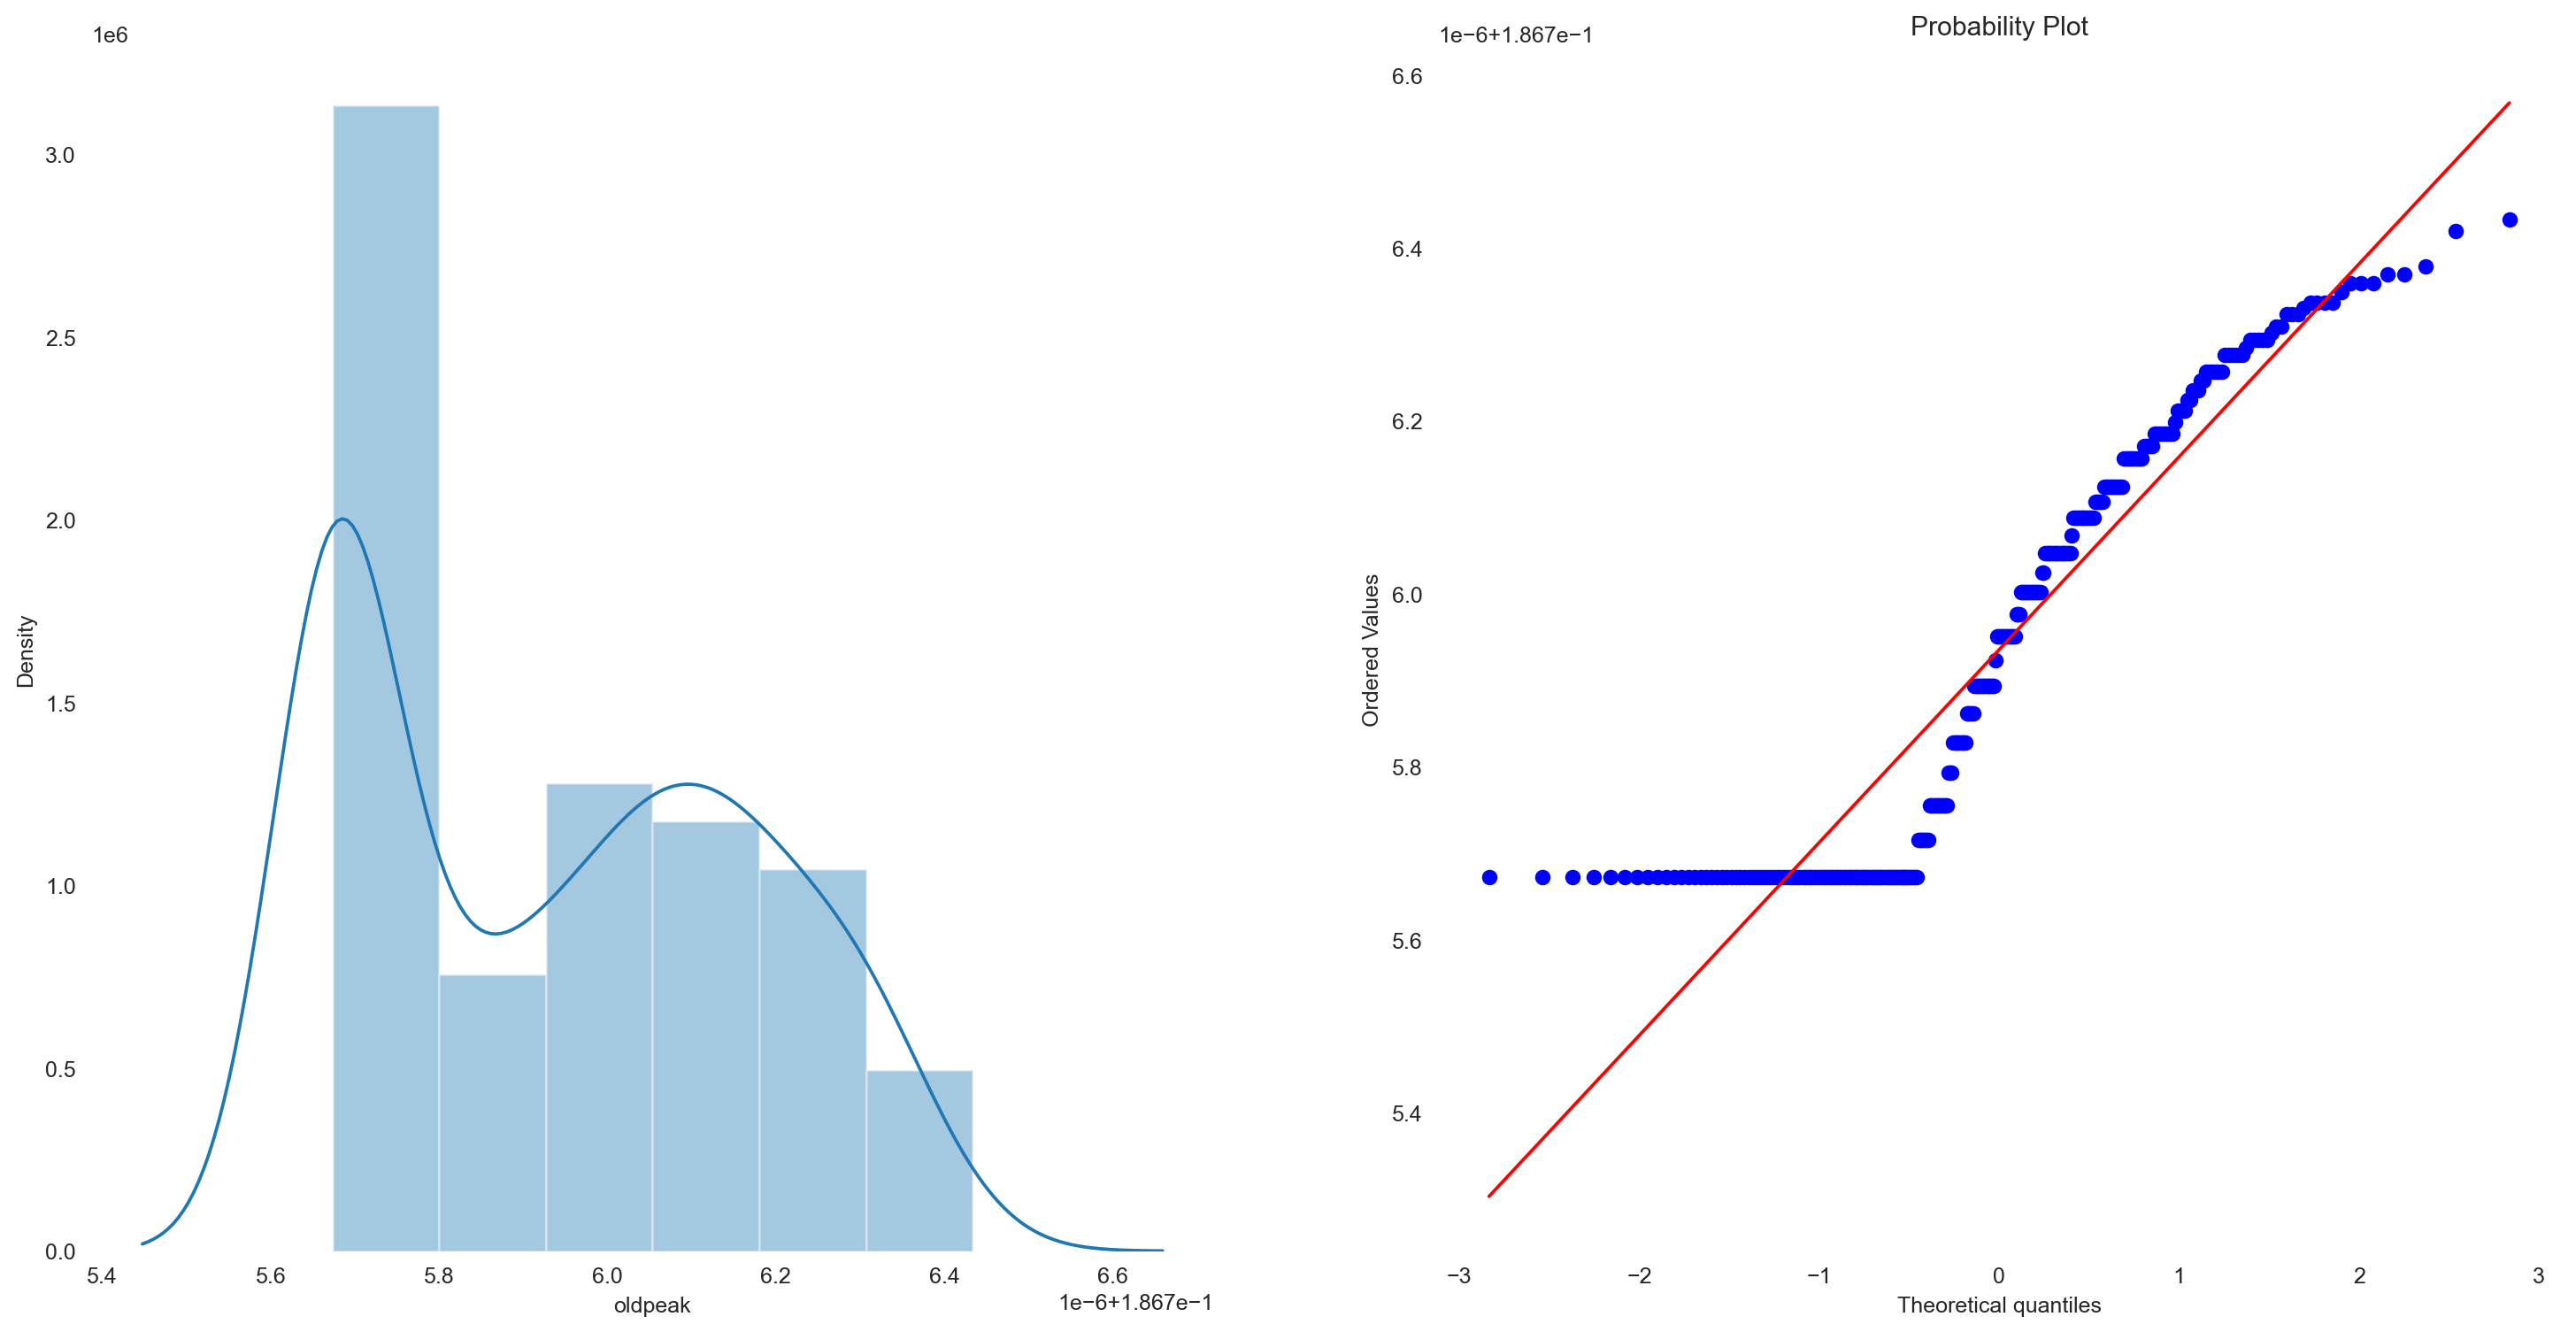

In [28]:
transform_skewed_neg_var(df,'oldpeak')

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.6 | Bivariate Analysis🧐</div>

In [29]:
def bi_con_analysis(df,con_var):
    df = df.copy()
    df['Target_Descr'] = np.where(df['target']==0,'Non Heart-Attack','Heart-Attack')
    length = len(con_var)
    fig = plt.figure(figsize = (10,20))

    cord = []
    row = length//2+1
    col = 2

    for i in range(length+1):
        s = str(row)+str(col)+str(i+1)
        cord.append(s)

    ax = fig.add_subplot(int(cord[0]))
    ax.text(x=0.4, y=0.5, s="Distribution of Target \n in \n Continuous Variables",
    verticalalignment='center', horizontalalignment='center',
    fontsize='25', fontweight='bold')
    ax.axis('off')

    i=1    
    for var in con_var:
            ax = fig.add_subplot(int(cord[i]))
            sns.boxplot(x=df['Target_Descr'],y=df[var],ax = ax)
            sns.stripplot(x=df['Target_Descr'], y=df[var], jitter=0.1, alpha=0.3, color='k',ax = ax)
            set_spines_visibility(ax, False)
            ax.set(xlabel = None)
            i=i+1
        #plt.close(len(cord))
        #plt.tight_layout()
            
    plt.show()

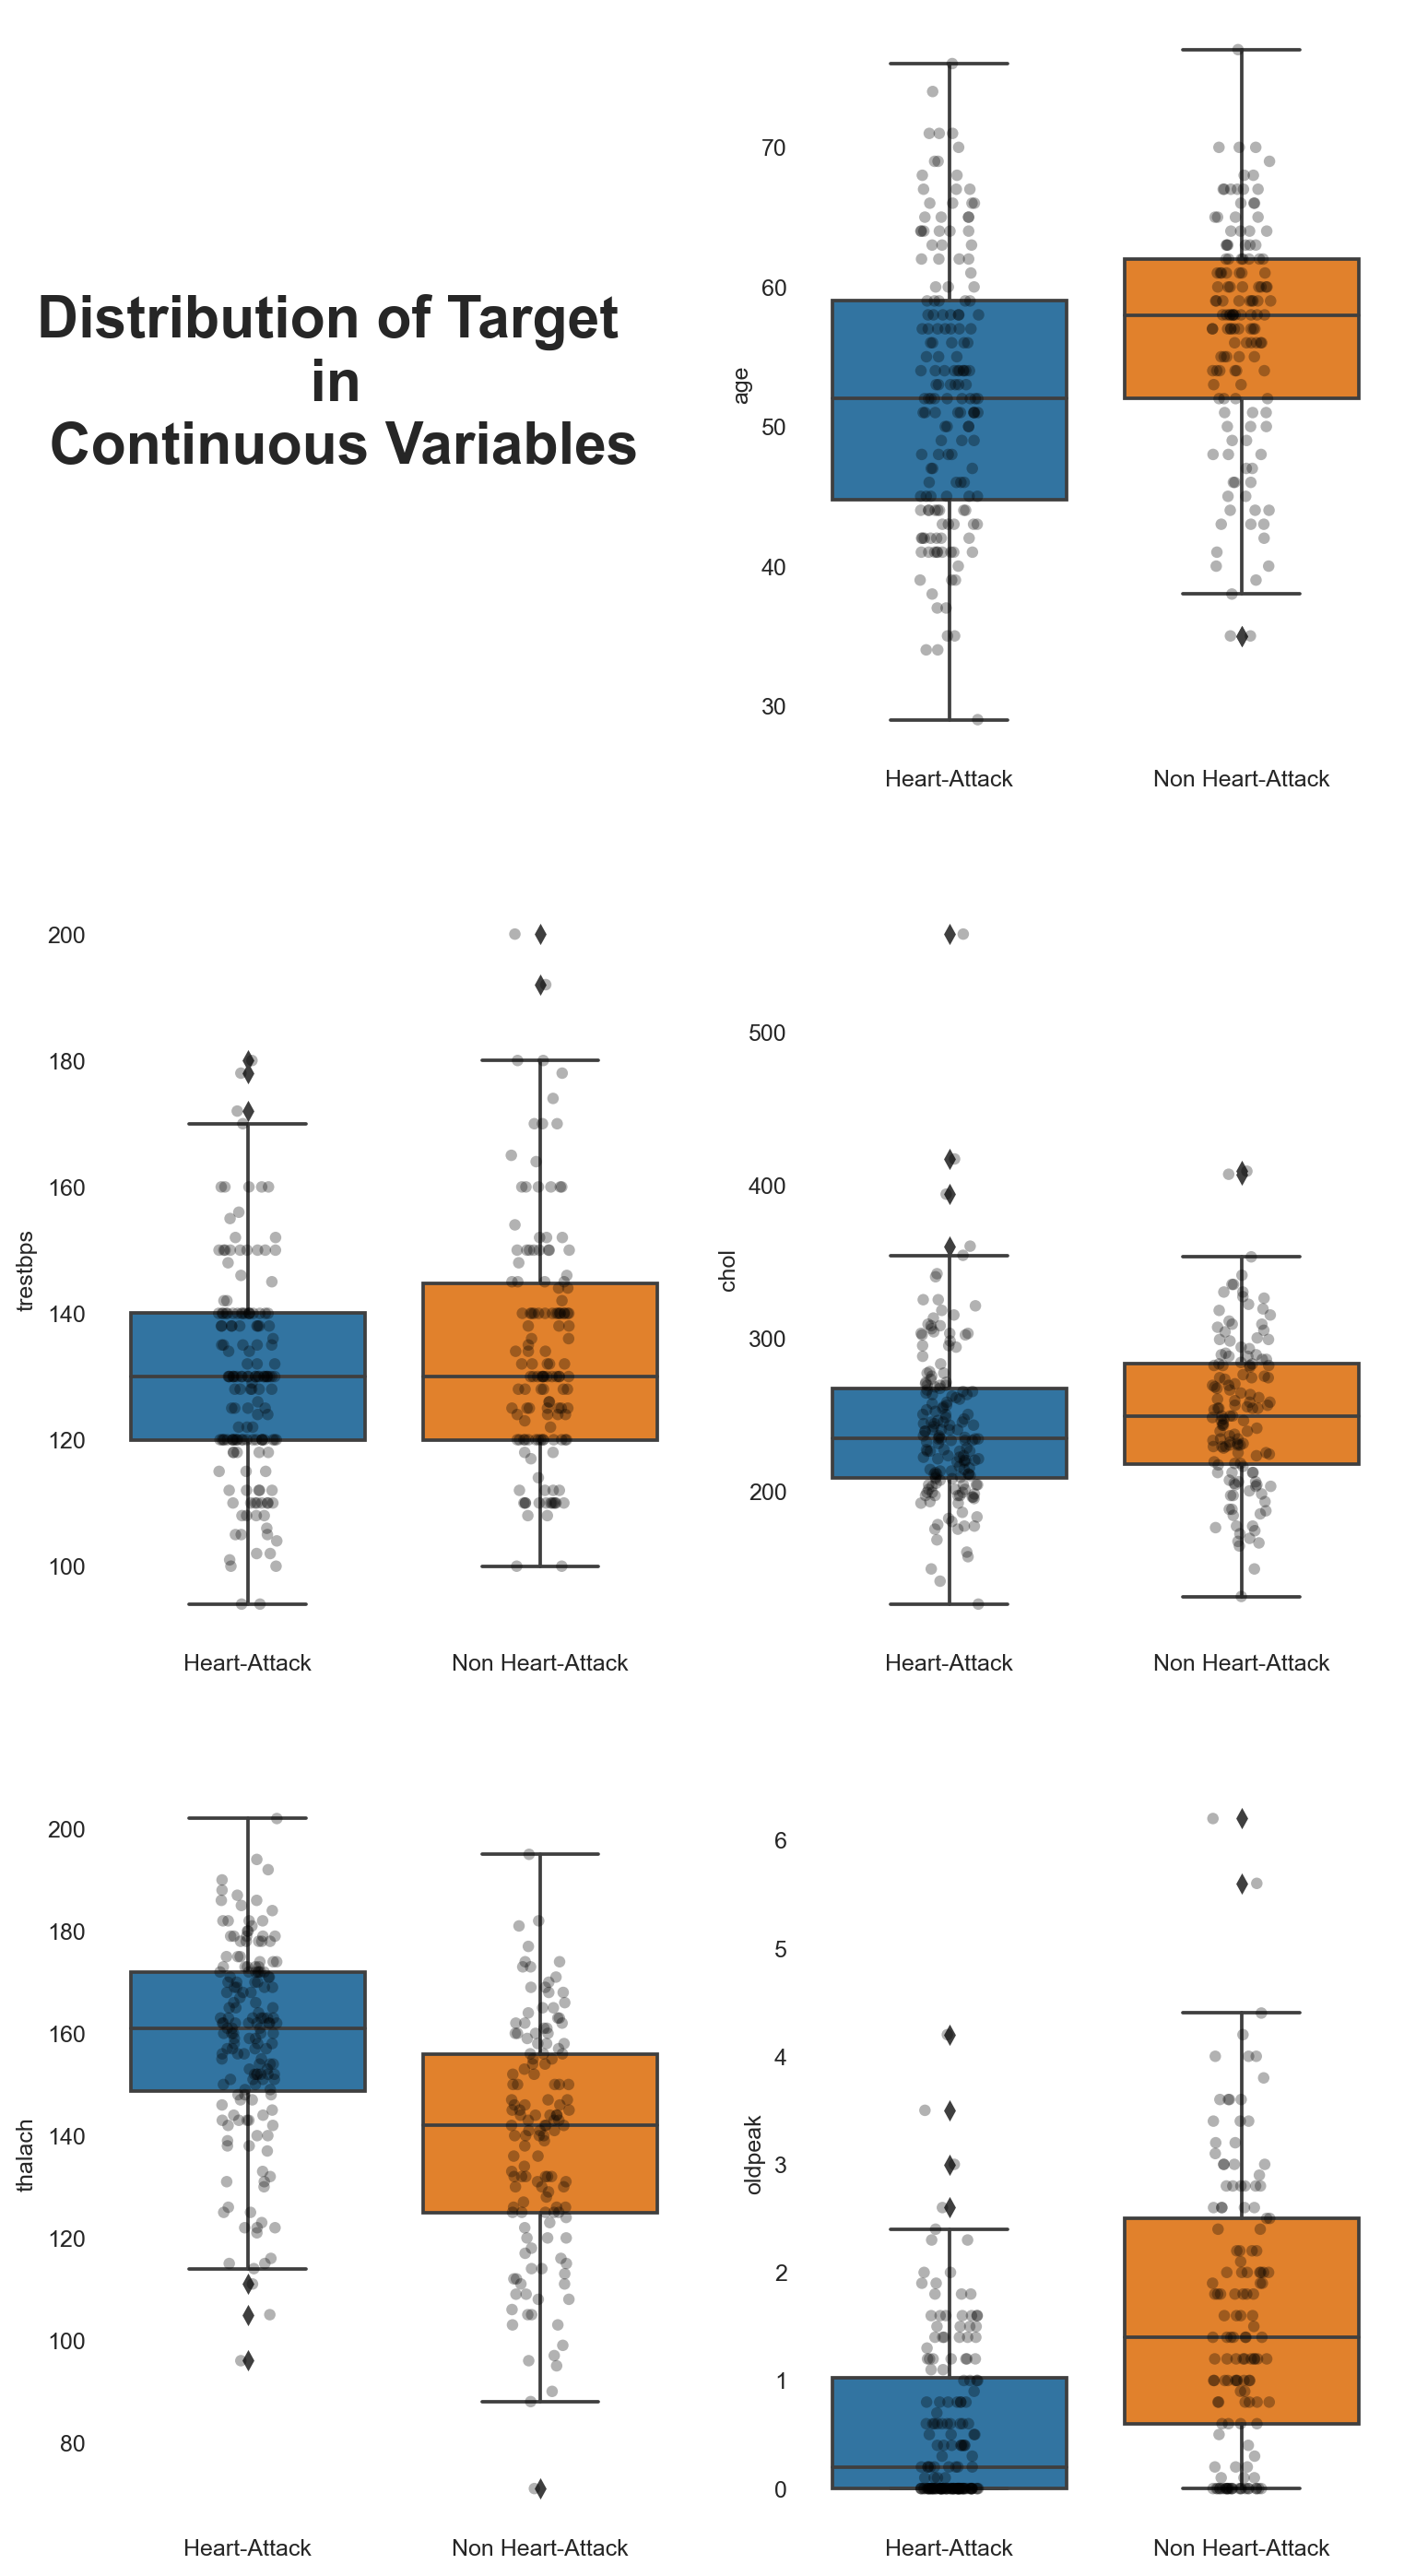

In [30]:
bi_con_analysis(df,df_num_con)

https://stackoverflow.com/questions/56788245/is-there-a-restriction-on-catplot-with-subplot

In [31]:
def bi_con_distplt_analysis(df,con_var):
    df = df.copy()
    df['Target Description'] = np.where(df['target']==0,'Non Heart-Attack','Heart-Attack')
    length = len(con_var)
    fig = plt.figure(figsize = (20,20))
    
    cord = []
    for i in range(length+1):
        cord.append(str(length//2+1)+str(2)+str(i+1))
        
        
    ax = fig.add_subplot(int(cord[0]))
    ax.text(x=0.4, y=0.5, s="Distribution of Target \n in \n Continuous Variables",
    verticalalignment='center', horizontalalignment='center',
    fontsize='40', fontweight='bold')
    ax.axis('off')
    

    #i=1 
    sns.set_style('white')
    for i,var in enumerate(con_var):
            ax = fig.add_subplot(int(cord[i+1]))
            #p = sns.displot(x=df[var],hue=df['Target Description'],kind='kde',height = 4, aspect = 0.8)
            sns.kdeplot(x=df[var],hue=df['Target Description'],multiple='stack',ax = ax)
            set_spines_visibility(ax, False)
            #p.despine(left=True, bottom=True)
         #p.fig.set_dpi(140)
            
        #plt.close(len(cord))
        #plt.tight_layout()
            
    plt.show()

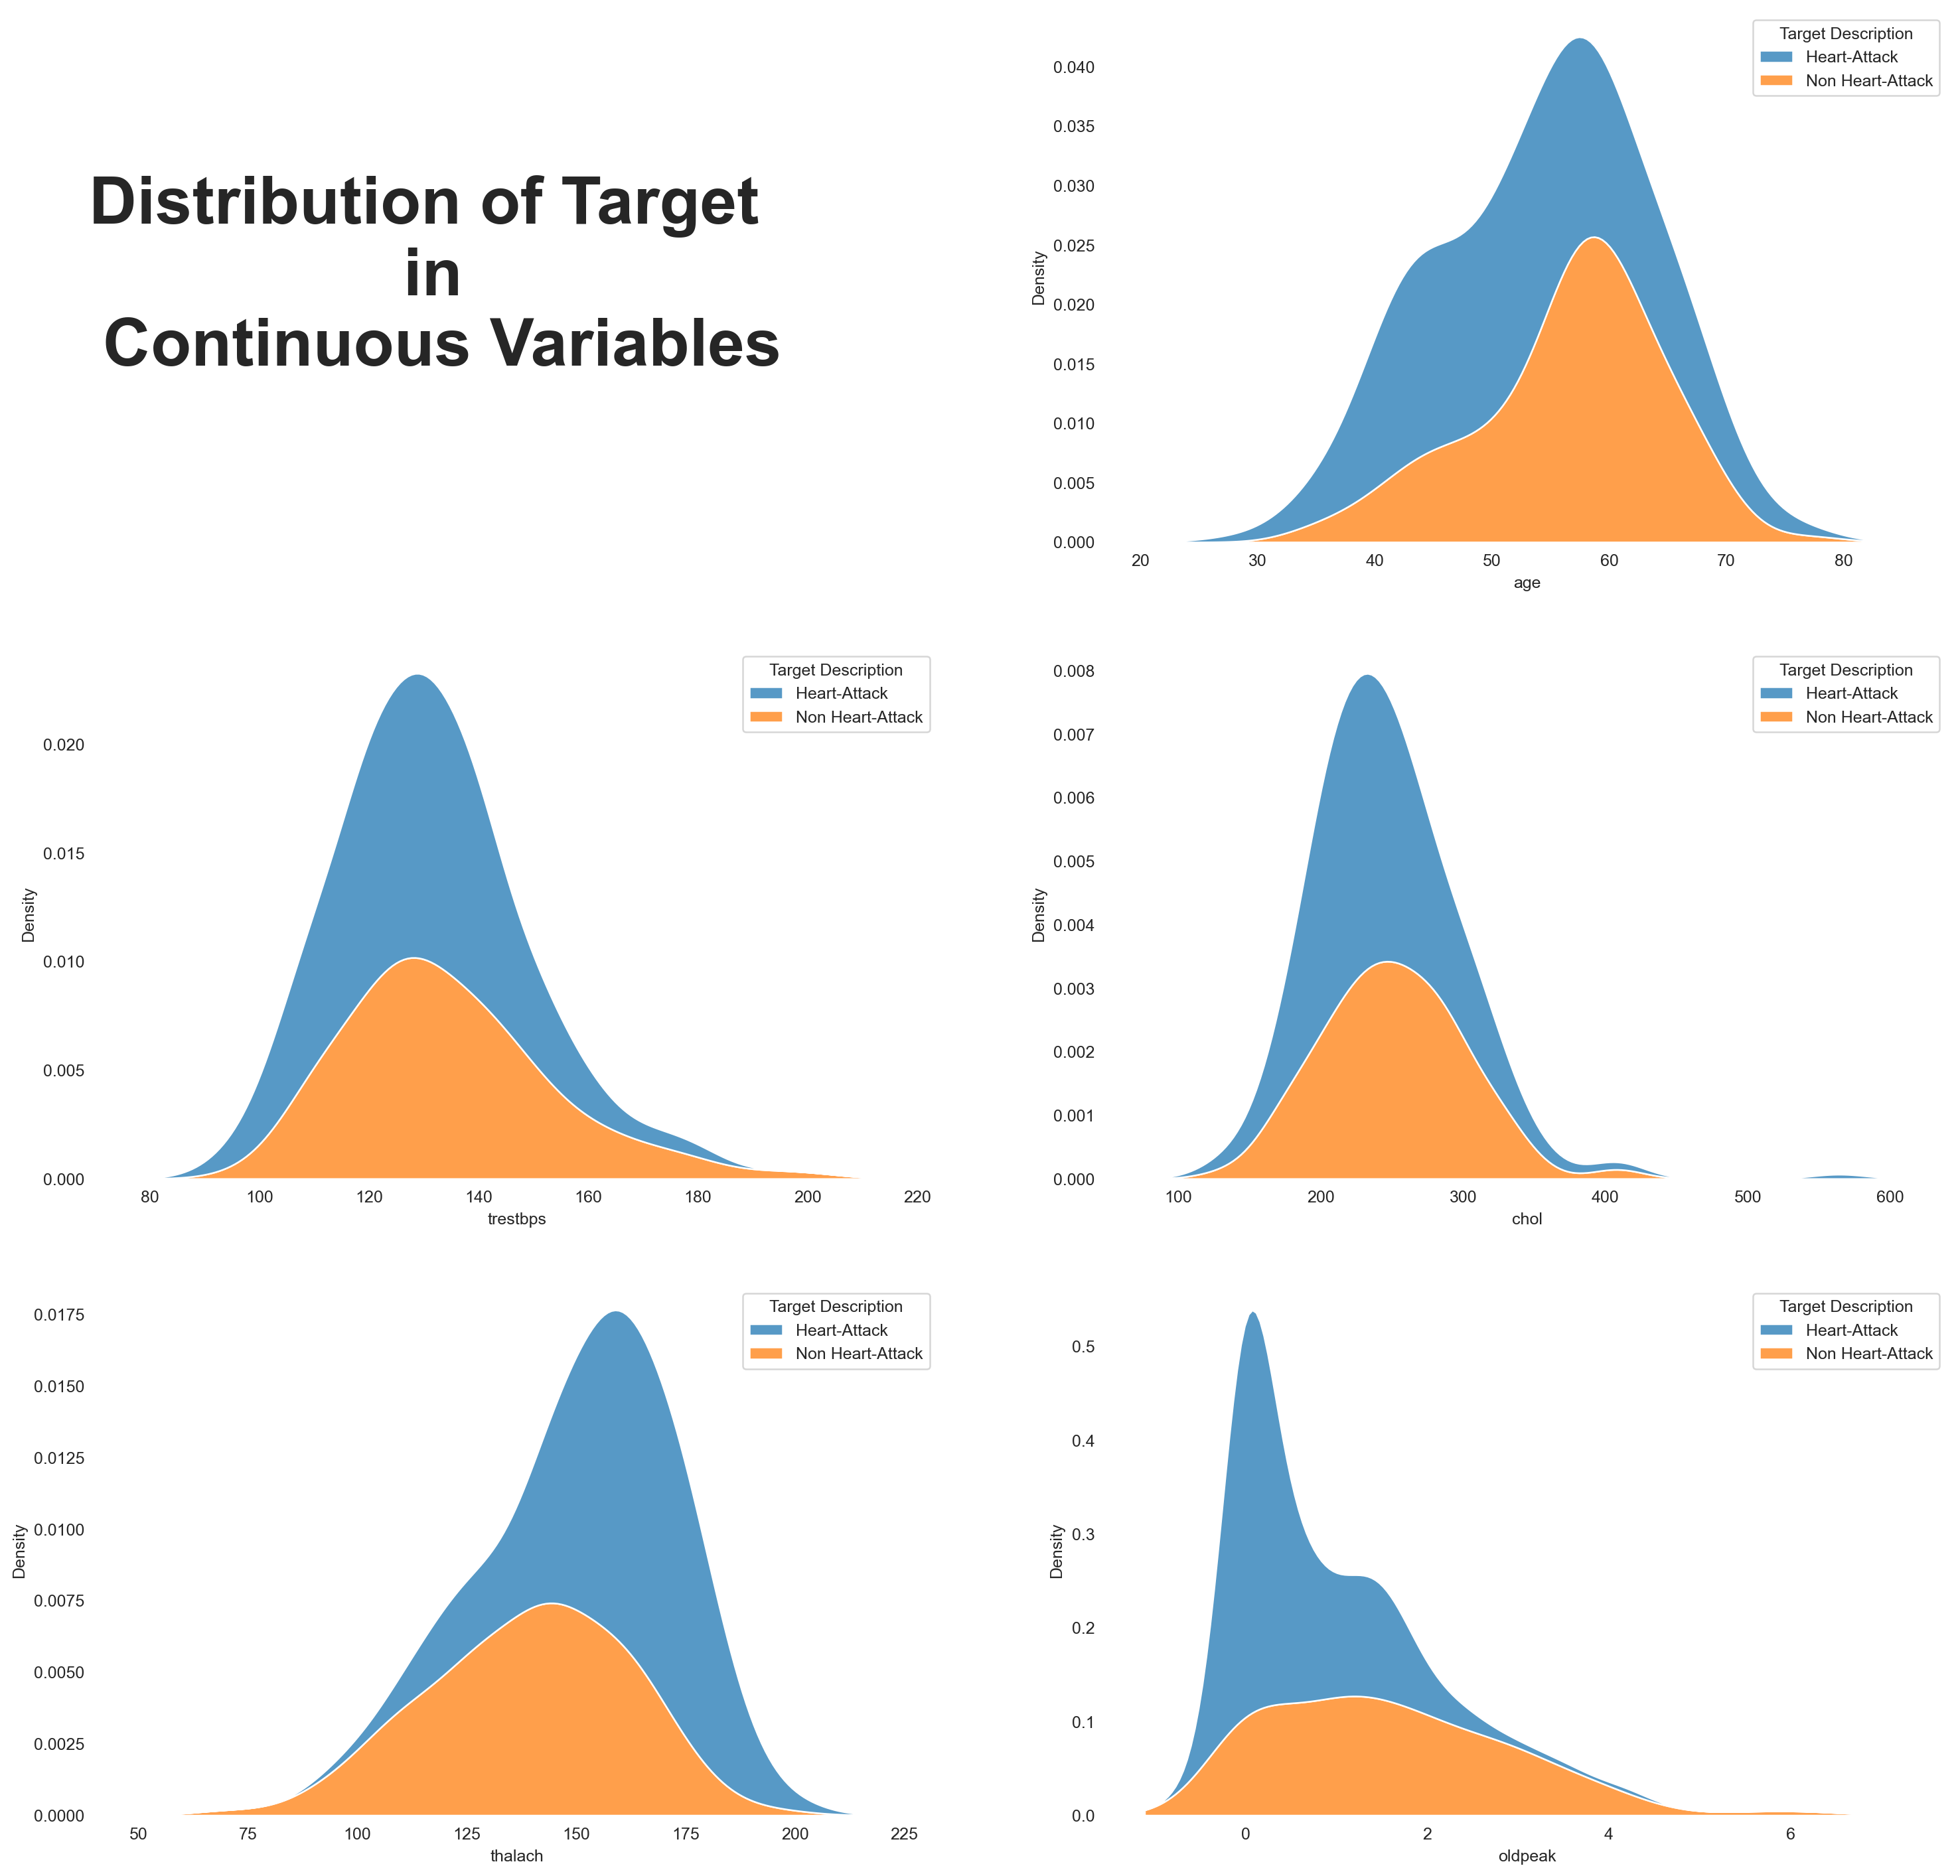

In [32]:
bi_con_distplt_analysis(df,df_num_con)

***More details related to displot:***
<a href = 'https://stackoverflow.com/questions/63895392/seaborn-is-not-plotting-within-defined-subplots'>StackOverFlow</a>
<a href = 'https://stackoverflow.com/questions/65415646/how-to-change-the-figure-size-of-a-displot'>StackOverFlow</a>
<a href = 'https://seaborn.pydata.org/generated/seaborn.displot.html'>Seaborn Displot</a>

In [33]:
def bi_dis_analysis(df,dis_var):
    df = df.copy()
    df['Target Description'] = np.where(df['target']==0,'Non Heart-Attack','Heart-Attack')
    length = len(dis_var)
    
    
    fig,ax = plt.subplots(length//2+1,2,figsize = (10,20))
        
    ax[0,0].text(x=0.5, y=0.5, s="Count plot of Target\n in \n Discrete variables",
        verticalalignment='center', horizontalalignment='center',
        fontsize='25', fontweight='bold')
    ax[0,0].axis('off')
    
    row = 0
    for i,var in enumerate(dis_var):
        i=i+1
        if i%2 == 1:
            set_spines_visibility(ax[row,1], False)
            p1 = sns.countplot(ax = ax[row,1],data=df,x=var,hue='Target Description')
            p1.bar_label(p1.containers[0])
        else:
            row = row+1
            set_spines_visibility(ax[row,0], False)
            p2 = sns.countplot(ax = ax[row,0],data = df, x = var, hue = 'Target Description')
            p2.bar_label(p2.containers[0])
    ax[length//2,1].axis('off')
    plt.show()
    

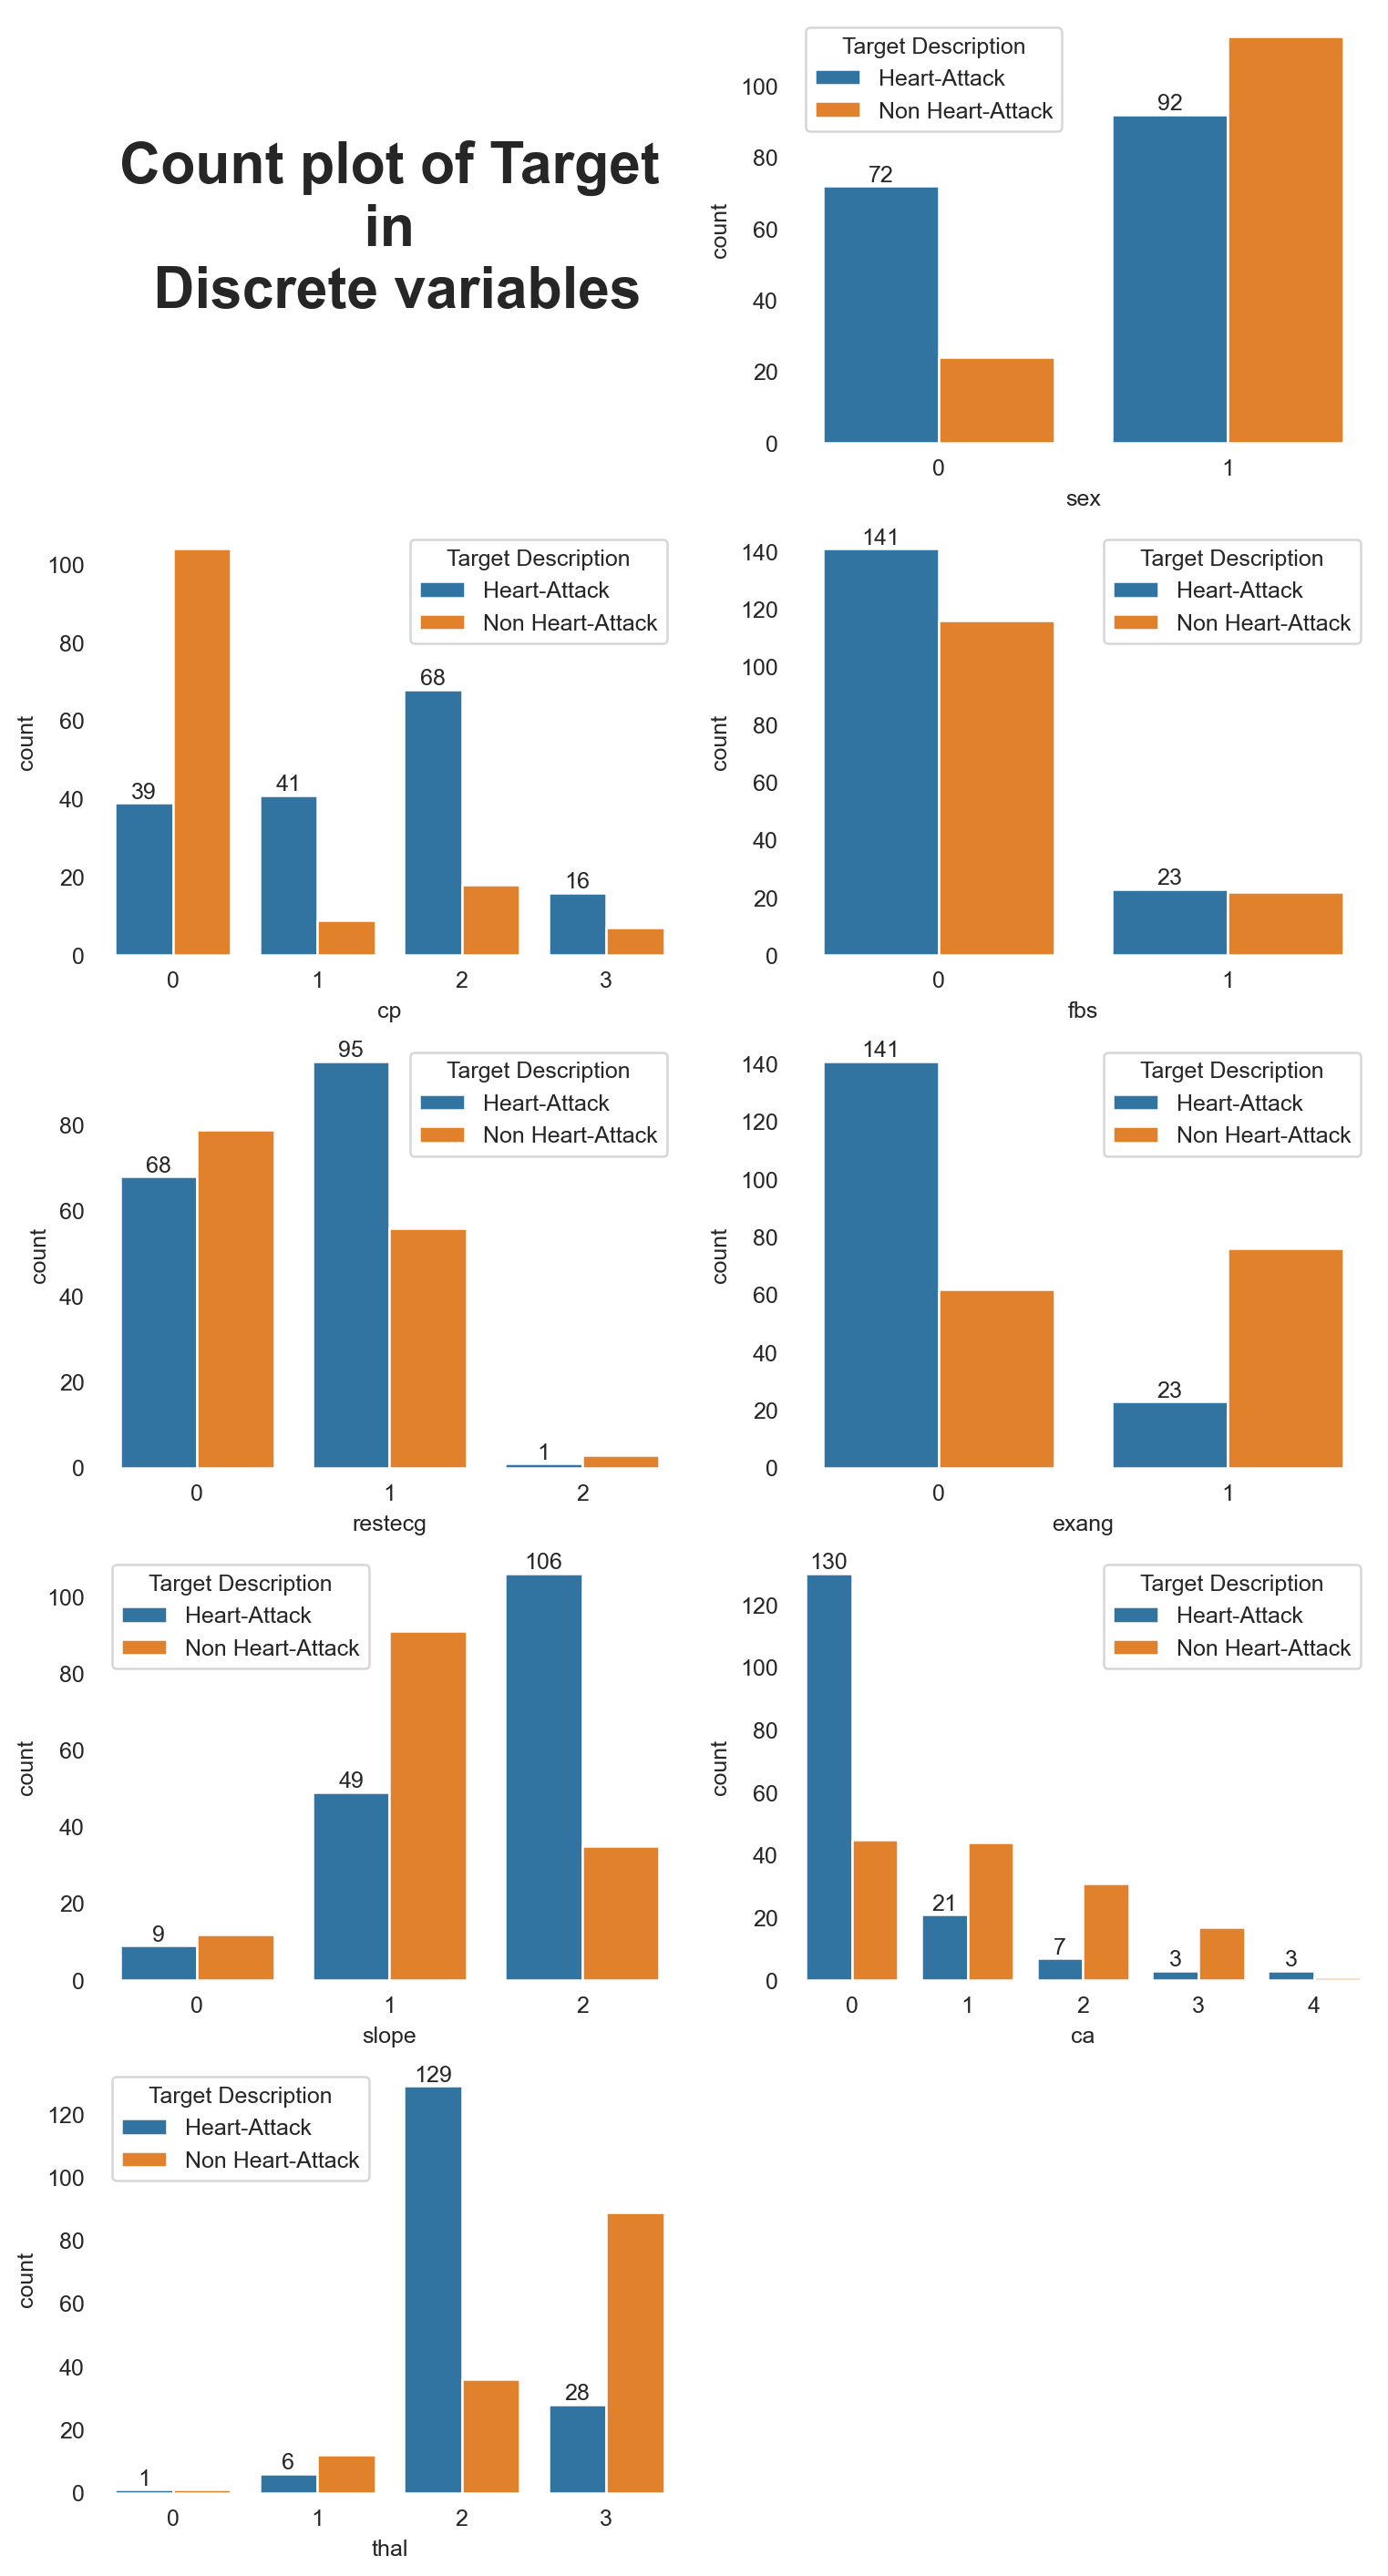

In [34]:
bi_dis_analysis(df,df_num_dis)

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.6 | Multi-Variate Analysis🧐</div>

***Reading Material***-<a href = 'https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117'>Source: TowardsDataScience</a>

<a href = 'https://towardsdatascience.com/python-statistics-for-beginners-pearson-correlation-coefficient-69c9b1ef17f7'>Source: TowardsDataScience</a>

In [35]:
def multi_var(df):
    df = df.copy()
    sns.set(font_scale=1.15)
    plt.figure(figsize=(15,8))
    
    sns.heatmap(
    df.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

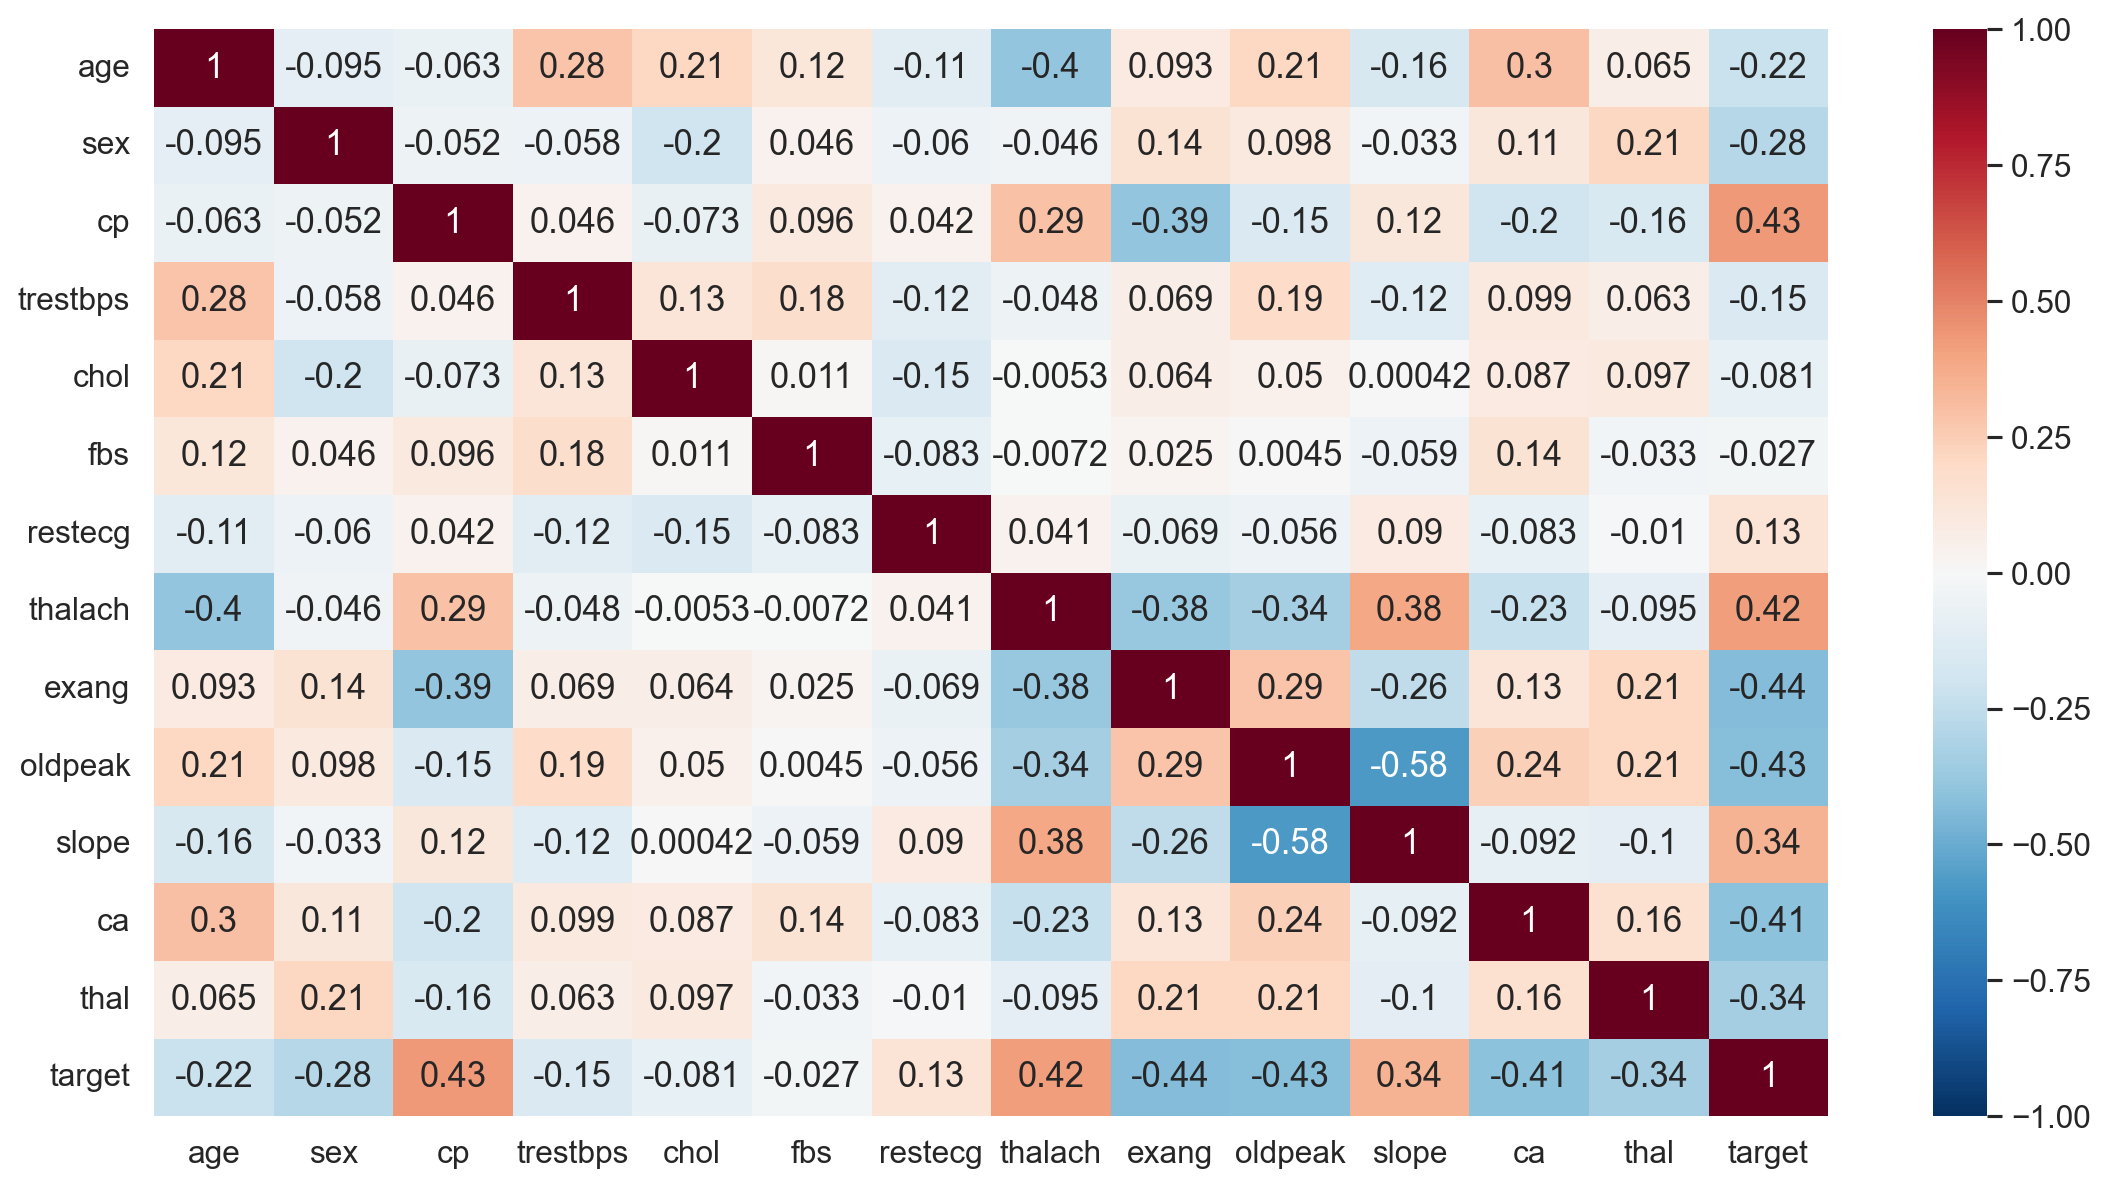

In [36]:
multi_var(df)

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">4 | Feature Enginerring👨‍🔧👷‍♂️</div>

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

There are two skewed variables - chol and oldpeak. These two varaibles needs to be transformed so that it shows gaussian distribution by reducing skewness.

In [37]:
df['chol'] = stats.boxcox(df['chol'])[0]
print(df['chol'].skew(axis = 0))
df['oldpeak'] = stats.boxcox(df['oldpeak']+10)[0]
print(df['oldpeak'].skew(axis = 0))

-0.006025706195089309
0.0


## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">4.1 | Split DataSet Into Train and Test Set ✂</div>

In [38]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 1, stratify = y)

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">4.2 | Feature Scaling 📏📐</div>

In [39]:
#Feature Scaling

#create scaler
scaler = MinMaxScaler()

scaler = scaler.fit(X_train)

# sklearn returns numpy arrays, so we wrap the
# array with a pandas dataframe

X_train = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.0 | Modelling👨‍🔧👩‍🔧</div>

In [41]:
#create model
model = LogisticRegression()

model.fit(X_train,y_train)

yhat = model.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, yhat)

array([[35,  7],
       [ 3, 46]], dtype=int64)

In [42]:
from sklearn.ensemble import RandomForestClassifier
#create model
model_rf = RandomForestClassifier(random_state=1)

model_rf.fit(X_train,y_train)

yhat_rf = model.predict(X_test)

confusion_matrix(y_test, yhat_rf)

array([[35,  7],
       [ 3, 46]], dtype=int64)

In [43]:
#prepare cross-validation procedure
cv = KFold(n_splits=3, random_state = 3, shuffle = True)
#evaluate model
scores = cross_val_score(model,X,y,scoring = 'accuracy',n_jobs = -1)
#report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

#evaluate model
scores = cross_val_score(model_rf,X,y,scoring = 'accuracy',n_jobs = -1)
#report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.824 (0.035)
Accuracy: 0.814 (0.054)


**Conclusion:** Logistic Regression and Random Forest gives almost the same accuracy. We got an accuracy of above 80%. It's good enough to predict heart diseses in effective manner.